 <font color="FF9900" size="7"><b>Amazon Holiday Shopping Behavior Analysis (2018–2022)</b></font>






## Understanding who drives spending, where, and when during the holiday season

###Time period: 2018-2022, 2 weeks before + Holiday week (Thanksgiving/Black Friday, Christmas)

###Team ID: B03

### Kyuwon Kim, Kean Zhu, Pin-Chu Yin, Tzu-Jen Chen, Yangze Li



<font color="#1E90FF" size="6"><b>Executive Summary</b></font>

This project analyzes over 1.8 million Amazon purchase records (2018–2022) and 5,000+ survey responses to identify which consumer segments drive U.S. holiday spending surges. Focusing on Thanksgiving and Christmas, the analysis reveals that Christmas spending is primarily gift-driven and emotion-based, showing a temporary drop in 2020 followed by a strong recovery. While the East Coast maintains higher overall spending, the gap with the West has narrowed, signaling increasing regional parity in shopping activity. Product-level data highlight Electronics (+40%), Home (+28%), and Outdoor (+23%) as the fastest-growing categories, reflecting lifestyle- and family-oriented purchases rather than essentials. A key finding unique to this analysis is that middle-income female consumers aged 25–44 are the most stable yet impactful contributors to holiday revenue, concentrated in the South (38.6%) and showing consistent basket sizes despite income variation. Together, these insights position this group as the most representative and resilient target for holiday campaigns, guiding regionally adaptive and data-driven marketing strategies for future seasonal planning.

<font color="#1E90FF" size="6"><b>Project Proposal / Business Problem Definition</b></font>





During the holiday season, Amazon usually sees big spikes in online shopping. However, it’s not always clear which demographic groups (eg. like age, gender, or income) are driving these surges. By looking at transaction data together with demographic information, we will try to understand how different groups shop during peak times compared to regular weeks, and which segments matter most for these seasonal patterns.

Understanding these differences is crucial for holiday marketing, pricing, and inventory planning. Our project aims to analyze these behavioral and demographic dimensions to identify:

1.   How product categories and purchase frequencies differ between holidays
2.   How do regional differences shape product category trends and spending behaviors?
3.   Which consumer groups contribute most to seasonal spending surges
4.   What insights can guide targeted marketing and efficient logistics planning

Through this analysis, we seek to generate actionable recommendations for data-driven holiday retail strategy, including promotional segmentation, inventory allocation, and customer engagement optimization.

**Dataset Description:**

*   Dataset Name: Amazon Open E-commerce 1.0
*   Authors: Dwarakanath, K., & Singh, M. (2022)
*   Description: Five years of crowdsourced U.S. Amazon purchase histories (2018–2022) with user demographics
*   Platform: Harvard Dataverse
*   Access Link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/YGLYDY
*   License: Provided for BA780 coursework, academic use only
*   Access Method: Shared via course Google Drive folder

<font color="#1E90FF" size="6"><b> Introduction & Motivation</b></font>

Holiday seasons represent the most competitive and high-revenue period for major e-commerce platforms like Amazon. Understanding who spends more, on what, and how often is key to optimizing marketing and operational decisions.

In this project, we analyze Amazon purchase records (2018–2022) combined with 5,000+ customer survey responses, enabling us to examine both transactional and demographic dimensions. By comparing holiday weeks (Thanksgiving and Christmas) with regular periods, we uncover how consumer spending patterns shift across regions, income classes, age groups, and education levels.

Our motivation is twofold:

**Managerial perspective** — help Amazon allocate budgets efficiently, tailor regional promotions, and forecast demand spikes by segment.

**Analytical perspective** — demonstrate how exploratory data analysis can extract meaningful behavioral insights from large-scale e-commerce data.

Ultimately, this analysis aims to translate data into actionable strategy, helping Amazon identify which customer segments drive holiday surges, what product categories dominate spending, and how regional or demographic differences can inform marketing and inventory planning.

<font color="#1E90FF" size="6"><b> Data Preparation (Cleaning & Merging)</b></font>

<font color="#0B132B" size="4"><b> Data Loading</b></font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_purchases = pd.read_csv('/content/drive/MyDrive/BA780 T3 Dataset/amazon-purchases.csv')
df_survey = pd.read_csv('/content/drive/MyDrive/BA780 T3 Dataset/survey.csv')
df_fields = pd.read_csv('/content/drive/MyDrive/BA780 T3 Dataset/fields.csv')

# Check shapes and preview
print("Purchases:", df_purchases.shape)
print("Survey:", df_survey.shape)
print("Fields:", df_fields.shape)

display(df_purchases.head(3))
display(df_survey.head(3))


Purchases: (1850717, 8)
Survey: (5027, 23)
Fields: (23, 2)


,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF
2,2018-12-24,8.99,1.0,NJ,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF


,Survey ResponseID,Q-demos-age,Q-demos-hispanic,Q-demos-race,Q-demos-education,Q-demos-income,Q-demos-gender,Q-sexual-orientation,Q-demos-state,Q-amazon-use-howmany,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
0,R_1ou69fj4DQGsVcp,35 - 44 years,No,Black or African American,High school diploma or GED,"$25,000 - $49,999",Female,heterosexual (straight),Iowa,2,...,No,Yes,No,No,Lost a job,No,No,No,No,No
1,R_2UbJL30HRjK1sdD,45 - 54 years,No,White or Caucasian,High school diploma or GED,"$100,000 - $149,999",Male,heterosexual (straight),Ohio,2,...,No,No,No,No,NaN,No,No,No,No,Yes
2,R_UPXamGKtmf4RVIZ,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$25,000 - $49,999",Male,heterosexual (straight),Arkansas,1 (just me!),...,No,No,Yes,No,NaN,No,No,No,No,Yes


<font color="#0B132B" size="4"><b> Data Overview</b></font>

We used three datasets:
1. **Amazon Purchases (2018–2022):** 1.8M transaction records with product and pricing info.  
2. **Customer Survey (2022):** Over 5,000 responses including demographics such as gender, income, education, and location.  
3. **Metadata (Fields):** Field mapping for survey questions.

These datasets were analyzed separately rather than merged, as each served a unique purpose in understanding customer behavior.


<font color="#0B132B" size="4"><b> Cleaning & Outlier Detection </b></font>

#### 1. Check the datasets first
#### **Justification**: Before cleaning, we check data types, null counts, and structure. This step gives us a clear baseline and helps us plan the cleaning work.



In [ ]:
# Check basic info about your datasets
print("\nPURCHASES DATASET")
# Show structure and data types for purchases dataset
print(df_purchases.info())
print("\nMissing values:")

# Count nulls per column in purchases dataset
print(df_purchases.isnull().sum())

print("\nSURVEY DATASET")
# Show structure and data types for survey dataset
print(df_survey.info())
print("\nMissing values:")

# Count nulls per column in survey dataset
print(df_survey.isnull().sum())

print("\nFIELDS DATASET")
# Show structure and data types for fields dataset
print(df_fields.info())


PURCHASES DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850717 entries, 0 to 1850716
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Order Date                object 
 1   Purchase Price Per Unit   float64
 2   Quantity                  float64
 3   Shipping Address State    object 
 4   Title                     object 
 5   ASIN/ISBN (Product Code)  object 
 6   Category                  object 
 7   Survey ResponseID         object 
dtypes: float64(2), object(6)
memory usage: 113.0+ MB
None

Missing values:
Order Date                      0
Purchase Price Per Unit         0
Quantity                        0
Shipping Address State      87812
Title                       89740
ASIN/ISBN (Product Code)      973
Category                    89458
Survey ResponseID               0
dtype: int64

SURVEY DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5027 entries, 0 to 5026
Data columns (total 23 colum

#### 2. Visualize outliers in key numeric columns before cleaning
**Takeaways**:

1. Most values are between Q1 and Q3, and the right side is longer. Some very high prices or quantities may come from bundle deals, discounts, or data mistakes.

2. We will mark or limit values outside [Q1 − 1.5×IQR, Q3 + 1.5×IQR] instead of deleting them to keep real large holiday purchases.

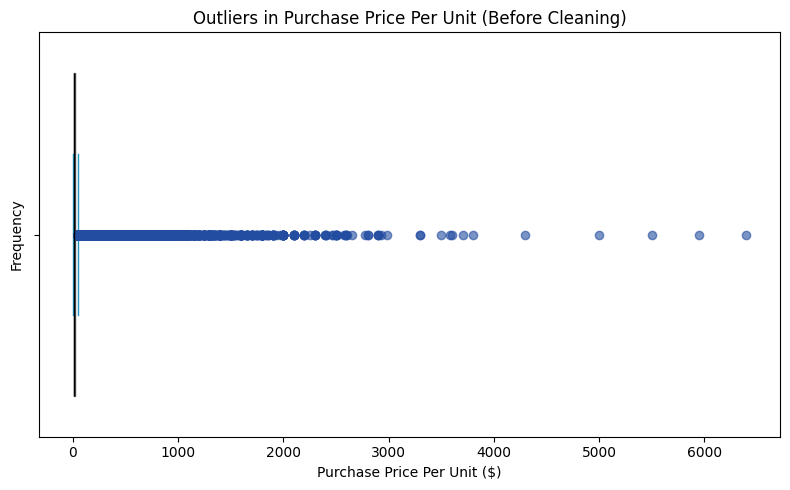

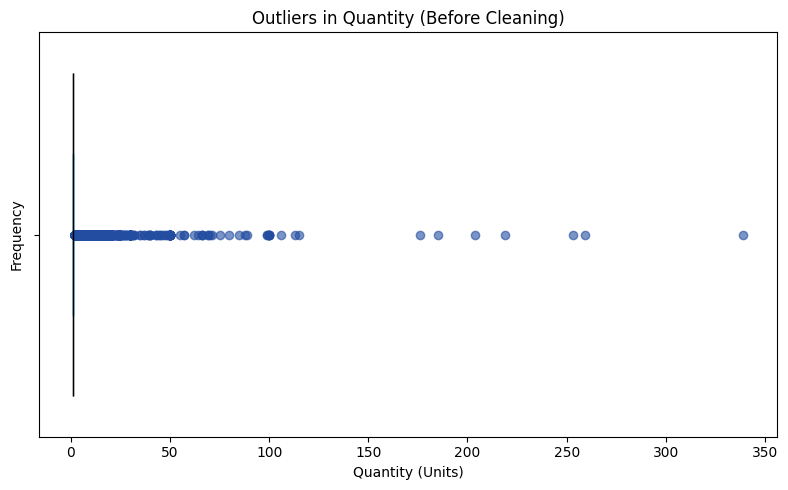

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette("YlGnBu", n_colors=4)
box_color   = colors[2]
outlier_col = colors[3]

# 1) Purchase Price Per Unit
plt.figure(figsize=(8,5))
sns.boxplot(
    x=df_purchases['Purchase Price Per Unit'].dropna(),
    color=box_color,
    saturation=1,
    boxprops={"alpha":0.9},
    medianprops={"color":"black"},
    whiskerprops={"color":box_color},
    capprops={"color":box_color},
    flierprops={"marker":"o",
                "markerfacecolor":outlier_col,
                "markeredgecolor":outlier_col,
                "alpha":0.6}
)
plt.title("Outliers in Purchase Price Per Unit (Before Cleaning)")
plt.xlabel("Purchase Price Per Unit ($)")
plt.ylabel("Frequency")
plt.tight_layout()

# 2) Quantity
plt.figure(figsize=(8,5))
sns.boxplot(
    x=df_purchases['Quantity'].dropna(),
    color=box_color,
    saturation=1,
    boxprops={"alpha":0.9},
    medianprops={"color":"black"},
    whiskerprops={"color":box_color},
    capprops={"color":box_color},
    flierprops={"marker":"o",
                "markerfacecolor":outlier_col,
                "markeredgecolor":outlier_col,
                "alpha":0.6}
)
plt.title("Outliers in Quantity (Before Cleaning)")
plt.xlabel("Quantity (Units)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### 3. Handling Missing Values
#### **Justification**:  Missing in required fields breaks analysis. In this step, we can check for missing values in key columns.


In [ ]:
# For purchases data
# Count nulls in purchases
missing_purchases = df_purchases.isnull().sum()
print("Missing values in purchases:", missing_purchases)

# For survey data
# count nulls in survey
missing_survey = df_survey.isnull().sum()
print("Missing values in survey:", missing_survey)

Missing values in purchases: Order Date                      0
Purchase Price Per Unit         0
Quantity                        0
Shipping Address State      87812
Title                       89740
ASIN/ISBN (Product Code)      973
Category                    89458
Survey ResponseID               0
dtype: int64
Missing values in survey: Survey ResponseID                0
Q-demos-age                      0
Q-demos-hispanic                 0
Q-demos-race                     0
Q-demos-education                0
Q-demos-income                   0
Q-demos-gender                   0
Q-sexual-orientation             0
Q-demos-state                    0
Q-amazon-use-howmany             0
Q-amazon-use-hh-size             0
Q-amazon-use-how-oft             0
Q-substance-use-cigarettes       0
Q-substance-use-marijuana        0
Q-substance-use-alcohol          0
Q-personal-diabetes              0
Q-personal-wheelchair            0
Q-life-changes                3384
Q-sell-YOUR-data              

#### 4. Data Type Correction
#### **Justification**: Dates must be datetime, numeric fields must be numeric, and categorical fields should be categories for consistent analysis.


In [ ]:
# Convert 'Order Date' column to datetime
if 'Order Date' in df_purchases.columns:
    df_purchases['Order Date'] = pd.to_datetime(df_purchases['Order Date'], errors='coerce')

# Step 2. Convert category-like columns
for col in ['Category', 'Title', 'ASIN/ISBN (Product Code)']:
    if col in df_purchases.columns:
        df_purchases[col] = df_purchases[col].astype('category')

# Step 3. Convert survey responses (for df_survey)
for col in df_survey.columns:
    if df_survey[col].dtype == 'object':
        if df_survey[col].str.isnumeric().any():
            df_survey[col] = pd.to_numeric(df_survey[col], errors='coerce')
        else:
            df_survey[col] = df_survey[col].astype('category')

#### 5. Remove Duplicates
#### **Justification**: Duplicate rows inflate totals and distort averages. Each purchase or survey response must be counted once.



In [ ]:
# Remove duplicate purchases
df_purchases_clean = df_purchases.drop_duplicates()

# Remove duplicate survey responses
df_survey_clean = df_survey.drop_duplicates()

# Print before and after row counts
print(f"Original purchases: {len(df_purchases)}")
print(f"After removing duplicates: {len(df_purchases_clean)}")
print(f"Original purchases: {len(df_survey)}")
print(f"After removing duplicates: {len(df_survey_clean)}")

Original purchases: 1850717
After removing duplicates: 1839093
Original purchases: 5027
After removing duplicates: 5027


#### 6. Detect and remove outliers in numeric columns
#### **Justification**: Extreme values skew averages and plots. In this step, we use IQR rule (Q1 − 1.5 * IQR, Q3 + 1.5 * IQR) to filter.



In [ ]:
# For numerical columns
numerical_columns = ['Purchase Price Per Unit', 'Quantity']

for col in numerical_columns:
    if col in df_purchases.columns:
        # Calculate IQR
        Q1 = df_purchases[col].quantile(0.25)
        Q3 = df_purchases[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_purchases = df_purchases[(df_purchases[col] >= lower_bound) &
                                   (df_purchases[col] <= upper_bound)]

#### 7. Standardize text fields
#### **Justification**: Inconsistent text (case, spaces, nulls) causes fragmented categories. This cleaning step ensures grouping and merging behave correctly.



In [ ]:
text_columns = ['Title', 'ASIN/ISBN (Product Code)', 'Category']

for col in text_columns:
    if col in df_purchases.columns:
        df_purchases[col] = (
            df_purchases[col]
            .astype("object")
            .fillna("")
            .astype(str)
            .str.strip()
            .str.lower()
        )

#### 8. Data Validation
#### **Justification**: Price and quantity must be positive values. Filtering invalid rows ensures correct totals and averages.



In [ ]:
# Validate data ranges and constraints
if 'Purchase Price Per Unit' in df_purchases.columns:
    df_purchases = df_purchases[df_purchases['Purchase Price Per Unit'] > 0]

if 'Quantity' in df_purchases.columns:
    df_purchases = df_purchases[df_purchases['Quantity'] > 0]

In [ ]:
# Save cleaned datasets
df_purchases_clean.to_csv('/content/drive/MyDrive/BA780 T3 Dataset/amazon-purchases-cleaned.csv', index=False)
df_survey_clean.to_csv('/content/drive/MyDrive/BA780 T3 Dataset/survey-cleaned.csv', index=False)

In [ ]:
# Quliaity Check
# Final quality assessment
print("Cleaning results")
print(f"Original purchases: {len(df_purchases)}")
print(f"Cleaned purchases: {len(df_purchases_clean)}")
print(f"Data loss: {((len(df_purchases) - len(df_purchases_clean)) / len(df_purchases) * 100):.2f}%")

print(f"\nOriginal survey: {len(df_survey)}")
print(f"Cleaned survey: {len(df_survey_clean)}")

# Check for remaining missing values
print(f"\nRemaining missing values in purchases: {df_purchases_clean.isnull().sum().sum()}")
print(f"Remaining missing values in survey: {df_survey_clean.isnull().sum().sum()}")

Cleaning results
Original purchases: 1608310
Cleaned purchases: 1839093
Data loss: -14.35%

Original survey: 5027
Cleaned survey: 5027

Remaining missing values in purchases: 260999
Remaining missing values in survey: 9524


<font color="#0B132B" size="4"><b>DATA PREP for selected period to analyze   </b></font>

In [ ]:
# Create new columns for Total Spending
df_purchases['Total_Spending'] = df_purchases['Purchase Price Per Unit'] * df_purchases['Quantity']

# Filter for 2018-2022
df_purchases = df_purchases[(df_purchases['Order Date'].dt.year >= 2018) &
                           (df_purchases['Order Date'].dt.year <= 2022)]

# Extract the year from the 'Order Date' column
df_purchases['Year'] = df_purchases['Order Date'].dt.year


holiday_weeks = [
    ("2018-11-08","2018-11-28","2018_Thanksgiving"),
    ("2018-12-11","2018-12-31","2018_Christmas"),
    ("2019-11-14","2019-12-04","2019_Thanksgiving"),
    ("2019-12-11","2019-12-31","2019_Christmas"),
    ("2020-11-12","2020-12-02","2020_Thanksgiving"),
    ("2020-12-11","2020-12-31","2020_Christmas"),
    ("2021-11-11","2021-12-01","2021_Thanksgiving"),
    ("2021-12-11","2021-12-31","2021_Christmas"),
    ("2022-11-10","2022-11-30","2022_Thanksgiving"),
    ("2022-12-11","2022-12-31","2022_Christmas")]

def labeled_dates(date):
    if pd.isna(date):
        return "Regular"
    if hasattr(date, 'strftime'):
        date_str = date.strftime('%Y-%m-%d')
    else:
        date_str = date
    for start, end, name in holiday_weeks:
        if start <= date_str <= end:
            if "Thanksgiving" in name:
                return "Thanksgiving"
            elif "Christmas" in name:
                return "Christmas"
    return "Regular"

df_purchases["Period"] = df_purchases["Order Date"].apply(labeled_dates)

<font color="#1E90FF" size="6"><b>Summary of the Team Assignment phase
</b></font>

###
In our initial Team Assignment, we explored overall holiday spending trends and identified
key patterns that guided our deeper analysis:
- **Holiday spending peaks:** Christmas spending exceeds Thanksgiving, focusing on gifts while Thanksgiving centers on family activities.
- **Regional Insights:** East Coast shows stronger holiday surges, while West Coast spending is becoming more steady year-round.
- **Product & Region:** East favors home and personal goods; West leans toward electronics and lifestyle products.
- **Demographics:** Female middle- and upper-income shoppers drive Christmas sales.
- **Basket Behavior:** Upper-income groups spend more overall, while middle-class baskets remain the most stable across seasons.

These insights laid the foundation for our final deep-dive analyses below.

###**How does total spending vary during holiday weeks compared to regular weeks?**
**Takeaway**

 For Amazon, the average spending generally rises during holiday weeks, with Christmas demonstrating higher average spendings than Thanksgiving. The line plot shows fluctuations in average spending over the years, with a noticeable drop around 2020, potentially influenced by the COVID-19 pandemic. Despite this drop, average holiday spending per transaction shows signs of recovery and even surpasses previous levels in some later years.


In [ ]:
# Calculate spending for each period type
thanksgiving_data = df_purchases[df_purchases["Period"] == "Thanksgiving"]
christmas_data = df_purchases[df_purchases["Period"] == "Christmas"]
regular_data = df_purchases[df_purchases["Period"] == "Regular"]

# Calculate total spending for each year's holiday week
print("\n HOLIDAY WEEK TOTALS")
for start_date, end_date, period_name in holiday_weeks:
    yearly_data = df_purchases[
        (df_purchases['Order Date'] >= start_date) &
        (df_purchases['Order Date'] <= end_date)]['Total_Spending'].sum()
    print(f"{period_name}: ${yearly_data:,.2f}")

print("\nAVERAGE PER PERIOD PER YEAR")
by_year_period = df_purchases.groupby(['Year', 'Period'])['Total_Spending'].mean().reset_index()
print(by_year_period)

print("\nAVERAGE PER PERIOD")
thanksgiving_average = thanksgiving_data["Total_Spending"].mean()
christmas_average = christmas_data["Total_Spending"].mean()
regular_average = regular_data["Total_Spending"].mean()

print(f"Thanksgiving periods average: ${thanksgiving_average:,.2f}")
print(f"Christmas periods average: ${christmas_average:,.2f}")
print(f"Regular periods average: ${regular_average:,.2f}")
print(f"Thanksgiving vs Regular difference: ${thanksgiving_average - regular_average:,.2f}")
print(f"Christmas vs Regular difference: ${christmas_average - regular_average:,.2f}")

# Filter for only holiday data
df_holiday = df_purchases[df_purchases['Period'] != 'Regular'].copy()

# Group by year and holiday period and calculate total spending
holiday_spending_by_year = df_holiday.groupby(['Year', 'Period'])['Total_Spending'].sum().reset_index()


 HOLIDAY WEEK TOTALS
2018_Thanksgiving: $228,247.71
2018_Christmas: $265,227.70
2019_Thanksgiving: $301,951.72
2019_Christmas: $326,130.67
2020_Thanksgiving: $420,617.25
2020_Christmas: $424,565.55
2021_Thanksgiving: $443,261.09
2021_Christmas: $436,971.87
2022_Thanksgiving: $422,939.95
2022_Christmas: $297,890.57

AVERAGE PER PERIOD PER YEAR
    Year        Period  Total_Spending
0   2018     Christmas       16.077329
1   2018       Regular       15.306671
2   2018  Thanksgiving       15.788041
3   2019     Christmas       15.833123
4   2019       Regular       15.412509
5   2019  Thanksgiving       15.604740
6   2020     Christmas       15.709522
7   2020       Regular       14.794323
8   2020  Thanksgiving       15.490066
9   2021     Christmas       16.179349
10  2021       Regular       15.293598
11  2021  Thanksgiving       16.250361
12  2022     Christmas       16.670803
13  2022       Regular       15.777198
14  2022  Thanksgiving       16.482461

AVERAGE PER PERIOD
Thanksgivi

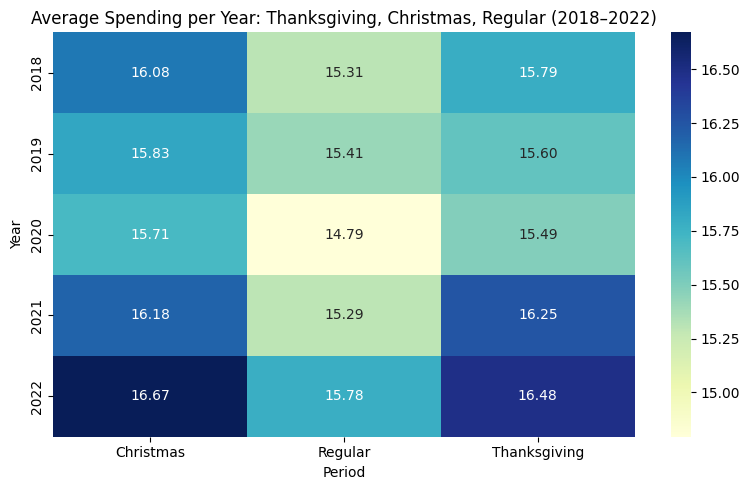

In [ ]:
# Create a pivot table for the heatmap
pivot_for_heat = by_year_period.pivot(index='Year', columns='Period', values='Total_Spending')

# Generate the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_for_heat, annot=True, fmt=".2f", cmap="YlGnBu")

plt.title("Average Spending per Year: Thanksgiving, Christmas, Regular (2018–2022)")
plt.xlabel("Period")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


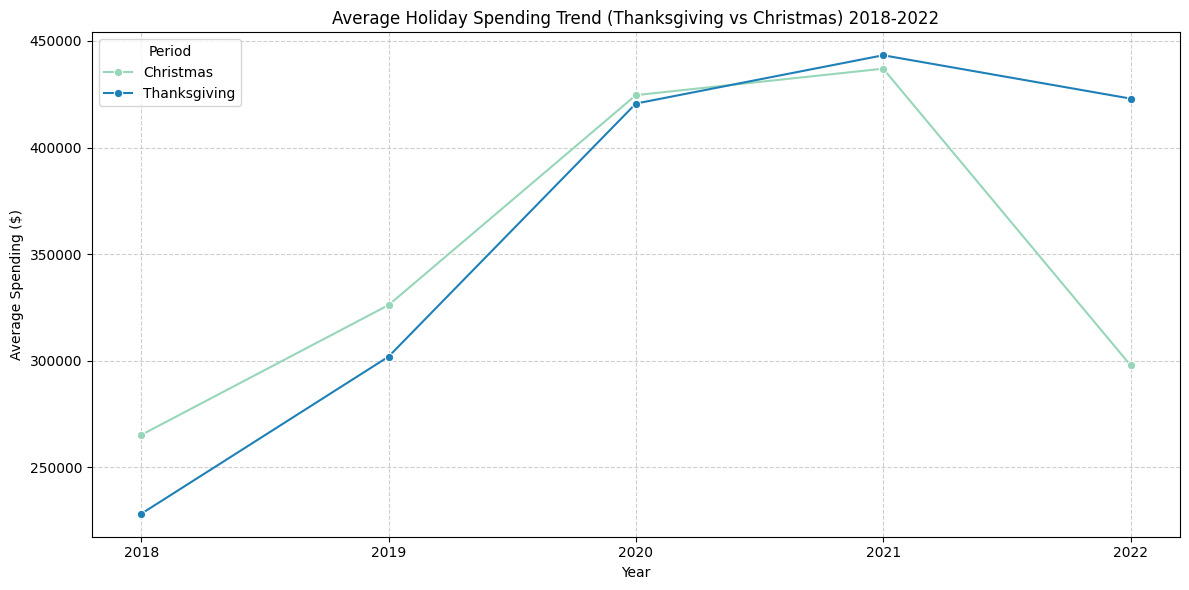

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=holiday_spending_by_year, x='Year', y='Total_Spending', hue='Period', marker='o', palette='YlGnBu')

plt.title('Average Holiday Spending Trend (Thanksgiving vs Christmas) 2018-2022')
plt.xlabel('Year')
plt.ylabel('Average Spending ($)')
plt.xticks(holiday_spending_by_year['Year'].unique())
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###**Which product categories show the largest spending increases during peak holiday periods compared to non-peak periods?**
**One-line takeaway**

The consumption during Thanksgiving Day focuses on family and activities, while during Christmas it centers around gifts and new purchases. Both have their peak consumption periods on the actual holiday day.

In [ ]:
CSV_PATH_PURCHASES = '/content/drive/MyDrive/BA780 T3 Dataset/amazon-purchases-cleaned.csv'
df = pd.read_csv(CSV_PATH_PURCHASES)

price_col = "Purchase Price Per Unit"
qty_col = "Quantity"
date_col = "Order Date"
cat_col = "Category"

# Cleaning
df[price_col] = df[price_col].astype(str).str.replace("$","",regex=False).str.replace(",","",regex=False)
df[price_col] = pd.to_numeric(df[price_col], errors="coerce")
df[qty_col] = pd.to_numeric(df[qty_col], errors="coerce")
df["date"] = pd.to_datetime(df[date_col], errors="coerce")

df = df.dropna(subset=["date", price_col, qty_col]).copy()
df = df[(df["date"] >= "2018-01-01") & (df["date"] <= "2022-12-31")].copy()

df["amount"] = df[price_col] * df[qty_col]
df["year"] = df["date"].dt.year

# Holiday windows
years = [2018,2019,2020,2021,2022]
rows = []
for y in years:
    rows.append(["Thanksgiving", y, f"{y}-11-06", f"{y}-11-19", f"{y}-11-20", f"{y}-11-30"])
    rows.append(["Christmas", y, f"{y}-12-10", f"{y}-12-23", f"{y}-12-24", f"{y}-12-31"])
hw = pd.DataFrame(rows, columns=["holiday","year","pre_start","pre_end","peak_start","peak_end"])
for c in ["pre_start","pre_end","peak_start","peak_end"]:
    hw[c] = pd.to_datetime(hw[c])

# Split into pre/peak

parts = []
for _, r in hw.iterrows():
    a = df[(df["date"] >= r["pre_start"]) & (df["date"] <= r["pre_end"]) & (df["year"] == r["year"])].copy()
    a["period"] = "pre"
    a["holiday"] = r["holiday"]
    parts.append(a)
    b = df[(df["date"] >= r["peak_start"]) & (df["date"] <= r["peak_end"]) & (df["year"] == r["year"])].copy()
    b["period"] = "peak"
    b["holiday"] = r["holiday"]
    parts.append(b)

full = pd.concat(parts, ignore_index=True) if len(parts) else df.assign(period="other", holiday="NA")

# Group by holiday/category
g = full.groupby(["holiday", cat_col, "period"], as_index=False)["amount"].sum()

pre_df  = g[g["period"]=="pre" ][["holiday",cat_col,"amount"]].rename(columns={"amount":"pre"}).copy()
peak_df = g[g["period"]=="peak"][["holiday",cat_col,"amount"]].rename(columns={"amount":"peak"}).copy()

summary = pre_df.merge(peak_df, on=["holiday",cat_col], how="outer")
summary["lift"] = summary["peak"] - summary["pre"]

tmp = summary.replace({"pre": {0: np.nan}})
summary["lift_pct"] = ((tmp["peak"] / tmp["pre"]) - 1) * 100
summary["lift_pct"] = summary["lift_pct"].round(2)

summary["growth_factor"] = np.where(summary["pre"] > 0, (summary["peak"] / tmp["pre"]).round(2), np.nan)
summary["trend"] = np.where(summary["lift_pct"] > 0, "↑ Increase",
                     np.where(summary["lift_pct"] < 0, "↓ Decrease", "No Change"))

# Top categories
thanks = summary[summary["holiday"]=="Thanksgiving"].dropna(subset=["lift_pct"]).sort_values("lift_pct", ascending=False).head(10).reset_index(drop=True)
xmas   = summary[summary["holiday"]=="Christmas"].dropna(subset=["lift_pct"]).sort_values("lift_pct", ascending=False).head(10).reset_index(drop=True)

print("Top by lift_pct — Thanksgiving")
print(thanks[[cat_col, "pre", "peak", "lift", "lift_pct"]])

print("\nTop by lift_pct — Christmas")
print(xmas[[cat_col, "pre", "peak", "lift", "lift_pct"]])

Top by lift_pct — Thanksgiving
                    Category    pre     peak     lift  lift_pct
0                 DISHWASHER  10.99   604.17   593.18   5397.45
1             POWER_TOOL_SET  29.50   927.81   898.31   3045.12
2             RADAR_DETECTOR  14.99   399.95   384.96   2568.11
3            FOOD_DEHYDRATOR  12.99   342.24   329.25   2534.64
4               TOY_STROLLER   7.99   210.05   202.06   2528.91
5                   FIRE_PIT  84.89  1900.69  1815.80   2139.00
6                 SPORT_GOAL  30.86   478.09   447.23   1449.22
7   INTEGRATED_STEREO_SYSTEM  68.36   905.40   837.04   1224.46
8  VIDEO_GAME_PERIPHERAL_SET  11.99   143.34   131.35   1095.50
9             PORTABLE_AUDIO  14.99   170.71   155.72   1038.83

Top by lift_pct — Christmas
                Category    pre    peak    lift  lift_pct
0  CAMERA_LENS_ACCESSORY   7.99  236.87  228.88   2864.58
1        CIRCUIT_BREAKER  20.07  165.77  145.70    725.96
2          GOLF_CLUB_BAG  33.58  255.00  221.42    659.38
3   

In [ ]:
# Plotting function
import matplotlib.cm as cm

def plot_pre_peak_with_lift(df_subset, cat_col, pre_col="pre", peak_col="peak", title=""):
    vals_all = np.concatenate([df_subset[pre_col].values, df_subset[peak_col].values])
    norm = plt.Normalize(vals_all.min(), vals_all.max())
    cmap = cm.get_cmap("YlGnBu")

    y = np.arange(len(df_subset))
    h = 0.38

    plt.figure(figsize=(9,6))
    plt.barh(y - h/2, df_subset["pre"], height=h, color="#1f77b4", label="Pre-Holiday")
    plt.barh(y + h/2, df_subset["peak"], height=h, color="#FFD700", label="Holiday")
    plt.yticks(y, df_subset[cat_col])
    plt.xlabel("Spending Amount ($)")
    plt.title(title)
    plt.legend(frameon=False)

    # Add percentage labels on the right side
    # Get the relevant data for annotations from the passed dataframe
    cats = df_subset[cat_col]
    vals_pre = df_subset[pre_col].values
    vals_peak = df_subset[peak_col].values
    lift = df_subset['lift_pct'].values


    for i in range(len(cats)):
        plt.text(max(vals_pre[i], vals_peak[i]) * 1.02, i,
                 f"+{lift[i]:.1f}%", va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1329065954.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlGnBu")


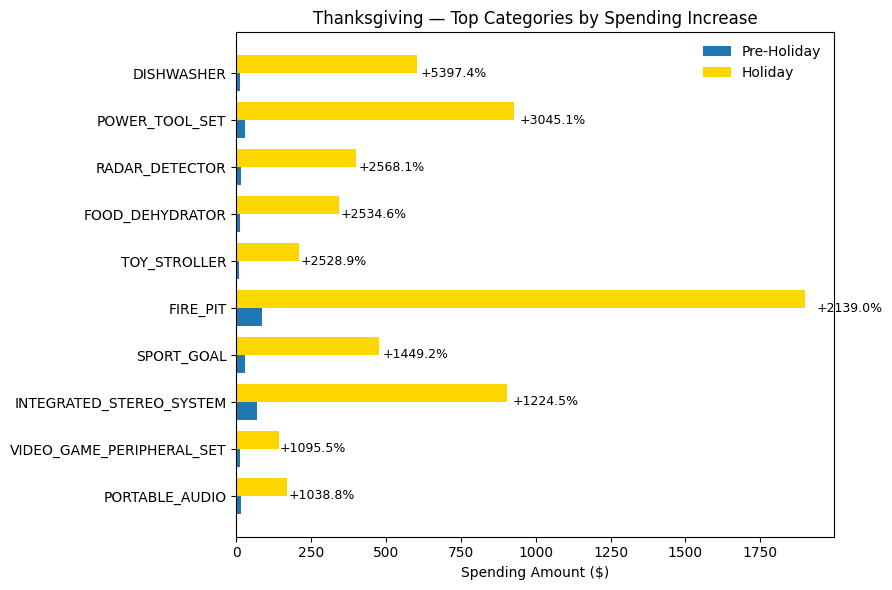

In [ ]:
#Thanksgiving
if not thanks.empty:
    top_plot = thanks.sort_values("lift_pct", ascending=False).head(10).iloc[::-1]
    plot_pre_peak_with_lift(
        top_plot, cat_col=cat_col, pre_col="pre", peak_col="peak",
        title="Thanksgiving — Top Categories by Spending Increase")

/tmp/ipython-input-1329065954.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlGnBu")


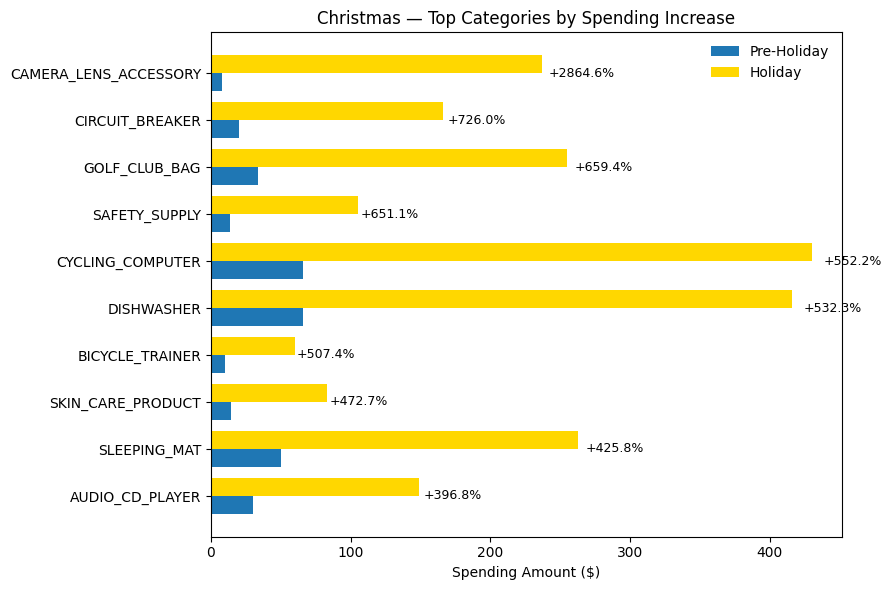

In [ ]:
#Christmas
if not xmas.empty:
    top_plot = xmas.sort_values("lift_pct", ascending=False).head(10).iloc[::-1]
    plot_pre_peak_with_lift(
        top_plot, cat_col=cat_col, pre_col="pre", peak_col="peak",
        title="Christmas — Top Categories by Spending Increase"
    )

###**Do East Coast and West Coast shoppers show different spending growth patterns during holiday seasons?**
**One-line takeaway:**
The East Coast shows a stronger holiday spending peak, while the West Coast and YoY trends indicate that spending is becoming more steady and evenly distributed throughout the year.


In [ ]:
!pip install plotly

import plotly.express as px
import pandas as pd

# Define east & west coast
east_coast_states = ['ME', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'DE', 'MD', 'VA', 'NC', 'SC', 'GA', 'FL', 'PA', 'VT']
west_coast_states = ['CA', 'WA', 'OR']

# Create DataFrame
all_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
              'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
              'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
              'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
              'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

regions = []
for state in all_states:
    if state in east_coast_states:
        regions.append('East Coast')
    elif state in west_coast_states:
        regions.append('West Coast')
    else:
        regions.append('Other')

df = pd.DataFrame({'state': all_states, 'Region': regions})

# Create map
fig = px.choropleth(
    df,
    locations='state',
    color='Region',
    locationmode='USA-states',
    color_discrete_map={
        'East Coast': '#7FCDBB',
        'West Coast': '#2C7FB8',
        'Other': '#E8E8E8'},
    category_orders={'Region': ['East Coast', 'West Coast', 'Other']}

)

fig.update_layout(geo_scope='usa',width=600,height=400)


fig.show()

Average Weekly Spending Table: 
 region        East Coast             West Coast            
holiday_label    Holiday Non-Holiday    Holiday Non-Holiday
year                                                       
2018            56443.21    35153.36   19632.89    15339.12
2019            71464.91    41765.26   27414.26    17425.55
2020            94513.56    61310.90   36158.17    24837.96
2021            99370.88    77101.46   35990.59    29463.00
2022            77519.78    73938.71   29422.02    29076.36


/tmp/ipython-input-3755671107.py:67: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Figure size 1200x600 with 0 Axes>

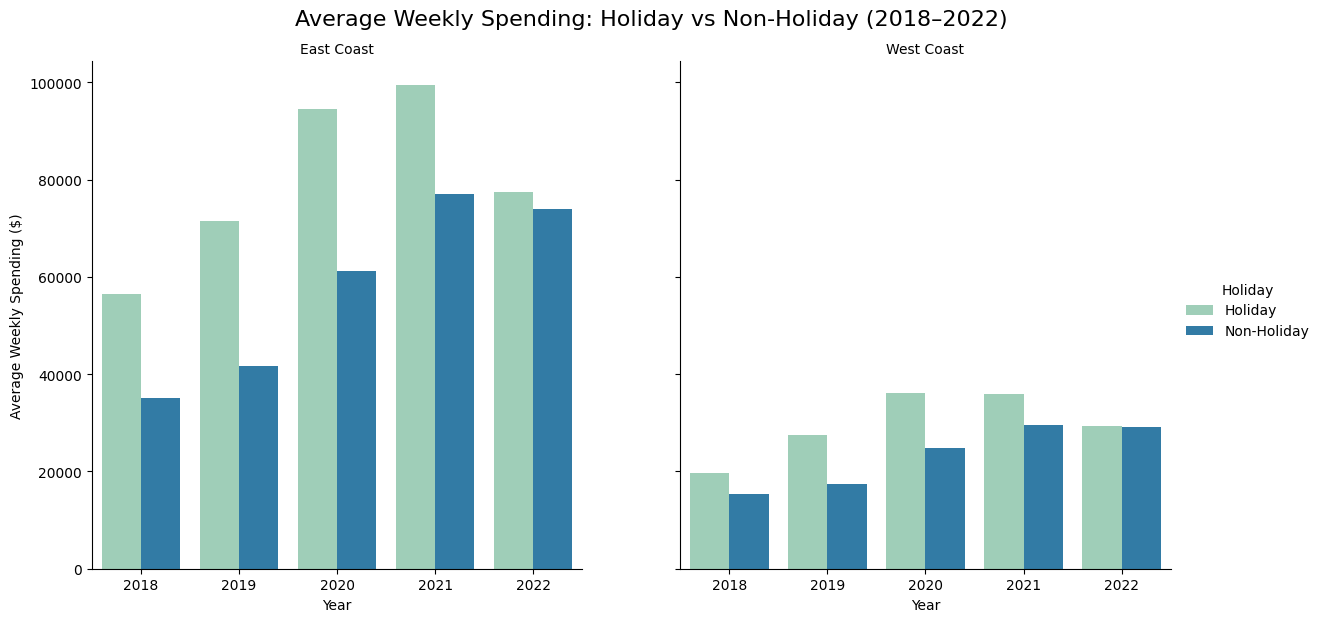

In [ ]:
from sys import last_value
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns

CSV_PATH_PURCHASES = '/content/drive/MyDrive/BA780 T3 Dataset/amazon-purchases-cleaned.csv'
df_q3 = pd.read_csv(CSV_PATH_PURCHASES)

df_q3['Order Date'] = pd.to_datetime(df_q3['Order Date'], errors='coerce')
df_q3['region'] = np.where(df_q3['Shipping Address State'].isin(east_coast_states), 'East Coast',
                    np.where(df_q3['Shipping Address State'].isin(west_coast_states), 'West Coast', 'Other'))


#Check if date is in holiday period

df_q3['is_holiday'] = df_q3['Order Date'].apply(labeled_dates)

# Filter for region + 2018-2022
df_filtered = df_q3[
    (df_q3['region'].isin(['East Coast','West Coast'])) &
    (df_q3['Order Date'].dt.year.between(2018, 2022))
].copy()

df_filtered['year'] = df_filtered['Order Date'].dt.year

# Create total spending
df_filtered['total_spending'] = df_filtered['Purchase Price Per Unit'] * df_filtered['Quantity']

# Aggregate using total spending instead of quantity
agg = df_filtered.groupby(['region','year','is_holiday'])['total_spending'].sum().reset_index()

# Calculate average per week
agg['weeks'] = agg['is_holiday'].map({
    'Thanksgiving': 3,
    'Christmas': 3,
    'Regular': 46
})
agg['avg_weekly'] = agg['total_spending'] / agg['weeks']

# Calculate growth
agg = agg.sort_values(by=['region', 'is_holiday', 'year'])
agg['growth_avg_weekly'] = agg.groupby(['region', 'is_holiday'])['avg_weekly'].pct_change()

# Plot
# 1. Average week consumption (holiday vs non-holiday)
plt.figure(figsize=(12,6))

palette = {'Holiday': '#ffd07a', 'Non-Holiday': '#8ecae6'}

agg['holiday_label'] = agg['is_holiday'].map({
    'Thanksgiving': 'Holiday',
    'Christmas': 'Holiday',
    'Regular': 'Non-Holiday'
})
agg['year'] = agg['year'].astype(int)

average_weekly_spending = agg.pivot_table(
    index='year',
    columns=['region', 'holiday_label'],
    values='avg_weekly'
).round(2)

print("Average Weekly Spending Table:" ,'\n', average_weekly_spending)

g = sns.catplot(
    data=agg,
    x='year',
    y='avg_weekly',
    kind='bar',
    hue='holiday_label',
    hue_order = ['Holiday', 'Non-Holiday'],
    col='region',
    palette = sns.color_palette("YlGnBu", 2),
    ci=None,
    height=6, aspect=1
)

g.set_titles("{col_name}")
g.set_axis_labels("Year", "Average Weekly Spending ($)")
g._legend.set_title("Holiday")
g.set_xticklabels(rotation=0)

g.fig.subplots_adjust(wspace=0.2)

g.fig.suptitle('Average Weekly Spending: Holiday vs Non-Holiday (2018–2022)', fontsize=16, y= 1.03)
plt.show()

YoY Table:  
 region        East Coast             West Coast            
holiday_label    Holiday Non-Holiday    Holiday Non-Holiday
year                                                       
2019                0.27        0.19       0.40        0.14
2020                0.32        0.47       0.32        0.43
2021                0.05        0.26      -0.01        0.19
2022               -0.23       -0.04      -0.19       -0.01


<Figure size 1200x600 with 0 Axes>

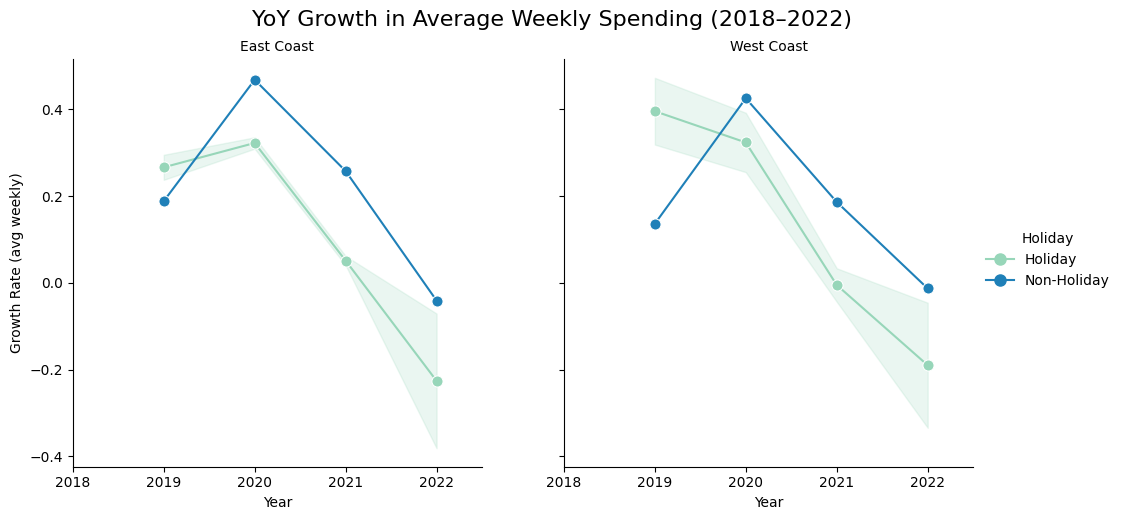

In [ ]:
# 2. YoY growth rate
plt.figure(figsize=(12,6))
palette = {'Holiday': '#ffd07a', 'Non-Holiday': '#8ecae6'}

agg_plot = agg[agg['year'] > 2018]
agg['holiday_label'] = agg['is_holiday'].map({True: 'Holiday', False: 'Non-Holiday'})
agg['year'] = agg['year'].astype(int)

yoy_table = agg_plot.pivot_table(
    index='year',
    columns=['region','holiday_label'],
    values='growth_avg_weekly'
).round(2)

print('YoY Table: ','\n', yoy_table)

g = sns.relplot(
    data=agg_plot,
    x='year',
    y='growth_avg_weekly',
    kind='line',
    hue='holiday_label',
    hue_order = ['Holiday', 'Non-Holiday'],
    col='region',
    palette = sns.color_palette("YlGnBu", 2),
    marker='o',
    markersize=8,
    dashes=False
)

g.set_titles("{col_name}")
g.set_axis_labels("Year", "Growth Rate (avg weekly)")
g._legend.set_title("Holiday")
g.set_xticklabels(rotation=0)

for ax in g.axes.flat:
    ax.set_xticks([2018, 2019, 2020, 2021, 2022])
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022])

g.fig.subplots_adjust(wspace=0.2)

g.fig.suptitle('YoY Growth in Average Weekly Spending (2018–2022)', fontsize=16, y= 1.03)
plt.show()

###**Does average basket size (spend per transaction) increase more for higher-income shoppers during holidays than for lower-income groups?**
**One-line takeaway**

Based on mean, standard deviation, and CV analysis, middle-class consumers maintain moderate spending power with lower volatility than upper-income groups, making them the most representative segment for holiday spending.


In [ ]:
# Recreate df with necessary columns
import pandas as pd
import numpy as np
CSV_PATH_SURVEY = '/content/drive/MyDrive/BA780 T3 Dataset/survey-cleaned.csv'
CSV_PATH_PURCHASES = '/content/drive/MyDrive/BA780 T3 Dataset/amazon-purchases-cleaned.csv'
df_purchases = pd.read_csv(CSV_PATH_PURCHASES)
df_survey = pd.read_csv(CSV_PATH_SURVEY)

droppurchases = df_purchases.copy()
survey = df_survey.copy()

droppurchases.rename(columns={'Survey ResponseID': 'survey_responseid'}, inplace=True)
survey.rename(columns={'Survey ResponseID': 'survey_responseid'}, inplace=True)

droppurchases.columns = droppurchases.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("/","_").str.replace("(","").str.replace(")","")
survey.columns = survey.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-","_")

droppurchases['survey_responseid'] = droppurchases['survey_responseid'].astype(str)
survey['survey_responseid'] = survey['survey_responseid'].astype(str)

merged = droppurchases.merge(survey, on='survey_responseid', how='inner')
merged['order_date'] = pd.to_datetime(merged['order_date'], errors='coerce')
merged_drop_order = merged.dropna(subset=['order_date'])

columns_to_keep = [
    'order_date',
    'purchase_price_per_unit',
    'quantity',
    'survey_responseid',
    'q_demos_age',
    'q_demos_income',
    'q_demos_gender',
    'q_demos_state',
    'q_demos_education']

merged = merged_drop_order[columns_to_keep].copy()

# Ensure 'q_demos_income' is string before applying categorize_income and filtering
merged['q_demos_income'] = merged['q_demos_income'].astype(str)

merged['holiday_period'] = merged['order_date'].apply(labeled_dates)
merged_holiday = merged[merged['holiday_period'] != "Regular"].copy()

df = merged_holiday.copy()

# Create holiday classification
df['holiday_period'] = df['order_date'].apply(labeled_dates)
df['is_holiday'] = df['holiday_period'] != "Regular"

# Income classification
df['income_numeric'] = df['q_demos_income'].str.replace('$', '').str.replace(',', '').str.extract(r'(\d+)').astype(float)

def categorize_income(income):
    if pd.isna(income):
        return 'Unknown'
    elif income <= 30000:
        return 'Lower class'
    elif income <= 94000:
        return 'Middle class'
    else:
        return 'Upper class'

df['income_class'] = df['income_numeric'].apply(categorize_income)
df = df[df['income_class'] != 'Unknown']

# Calculate basket size per order
df['basket_size'] = df['purchase_price_per_unit'] * df['quantity']
df['order_id'] = df['survey_responseid'] + '_' + df['order_date'].dt.strftime('%Y-%m-%d')

# Group by order to get order-level basket sizes
order_data = df.groupby(['order_id', 'income_class', 'is_holiday', 'order_date'])['basket_size'].sum().reset_index()

print("Order data shape:", order_data.shape)
print("\nSample data:")
display(order_data.head(3))

Order data shape: (105926, 5)

Sample data:


,order_id,income_class,is_holiday,order_date,basket_size
0,R_01vNIayewjIIKMF_2018-12-22,Lower class,True,2018-12-22,13.99
1,R_01vNIayewjIIKMF_2018-12-24,Lower class,True,2018-12-24,8.99
2,R_01vNIayewjIIKMF_2018-12-25,Lower class,True,2018-12-25,20.45


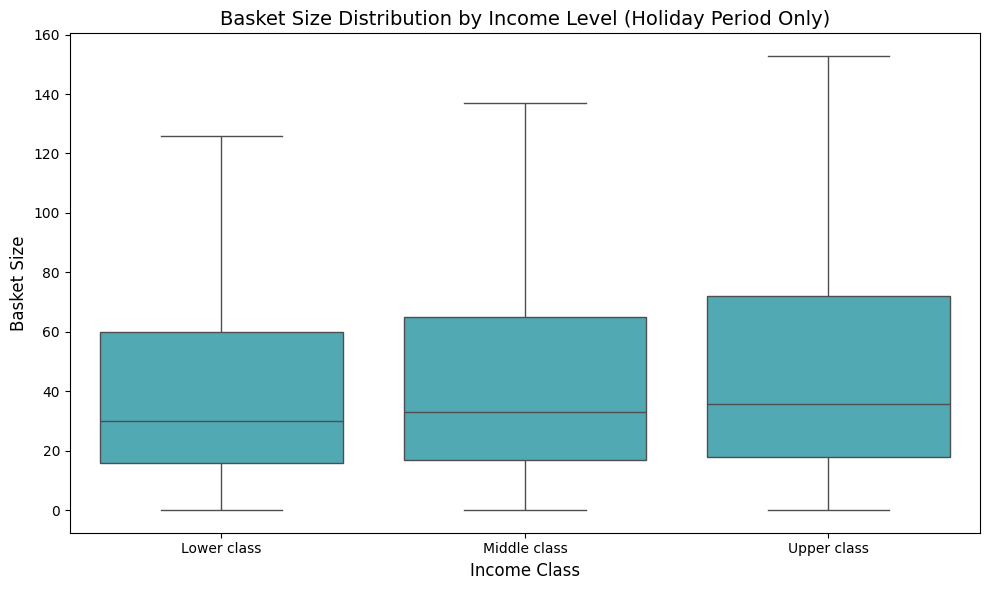

In [ ]:
# Pick color palette (1 color from YlGnBu)
ylgnbu_color = sns.color_palette("YlGnBu", 1)[0]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=order_data,
    x="income_class",
    y="basket_size",
    color=ylgnbu_color,
    showfliers=False
)

plt.title("Basket Size Distribution by Income Level (Holiday Period Only)", fontsize=14)
plt.xlabel("Income Class", fontsize=12)
plt.ylabel("Basket Size", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
order_data.groupby('income_class')['basket_size'].describe()[['mean','50%','std']]


,mean,50%,std
income_class,,,
Lower class,53.954322,29.990,84.849824
Middle class,59.457666,32.990,93.649684
Upper class,66.447747,35.655,131.236149


In [ ]:
summary = order_data.groupby('income_class')['basket_size'].agg(['mean','std'])
summary['cv'] = summary['std'] / summary['mean']
print(summary)


                   mean         std        cv
income_class                                 
Lower class   53.954322   84.849824  1.572623
Middle class  59.457666   93.649684  1.575065
Upper class   66.447747  131.236149  1.975028


###**During major U.S. holidays like Christmas and Thanksgiving, which income and gender groups contribute most to Amazon’s seasonal sales increases?**
**One-line takeaway**

Because Christmas shows the highest average spending, we decided to look at which segment drives the seasonal sales increase. We found that females outspend males across all income levels during Christmas, with middle-class females displaying the strongest purchasing power. Lower-class males represent the smallest market opportunity with minimal order quantities.

In [ ]:
import pandas as pd
import numpy as np
CSV_PATH_SURVEY = '/content/drive/MyDrive/BA780 T3 Dataset/survey-cleaned.csv'
CSV_PATH_PURCHASES = '/content/drive/MyDrive/BA780 T3 Dataset/amazon-purchases-cleaned.csv'
df_purchases = pd.read_csv(CSV_PATH_PURCHASES)
df_survey = pd.read_csv(CSV_PATH_SURVEY)

droppurchases = df_purchases.copy()
survey = df_survey.copy()

droppurchases.rename(columns={'Survey ResponseID': 'survey_responseid'}, inplace=True)
survey.rename(columns={'Survey ResponseID': 'survey_responseid'}, inplace=True)

droppurchases.columns = droppurchases.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("/","_").str.replace("(","").str.replace(")","")
survey.columns = survey.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-","_")

droppurchases['survey_responseid'] = droppurchases['survey_responseid'].astype(str)
survey['survey_responseid'] = survey['survey_responseid'].astype(str)

merged = droppurchases.merge(survey, on='survey_responseid', how='inner')
merged['order_date'] = pd.to_datetime(merged['order_date'], errors='coerce')
merged_drop_order = merged.dropna(subset=['order_date'])

columns_to_keep = [
    'order_date',
    'purchase_price_per_unit',
    'quantity',
    'survey_responseid',
    'q_demos_age',
    'q_demos_income',
    'q_demos_gender',
    'q_demos_state',
    'q_demos_education']

merged = merged_drop_order[columns_to_keep].copy()

US_REGIONS = {
    'West': [
        "Montana", "Idaho", "Wyoming", "Colorado", "New Mexico", "Arizona",
        "Utah", "Nevada", "Washington", "Oregon", "California", "Alaska", "Hawaii"
    ],
    'Midwest': [
        "Ohio", "Michigan", "Indiana", "Wisconsin", "Illinois", "Minnesota",
        "Iowa", "Missouri", "North Dakota", "South Dakota", "Nebraska", "Kansas"
    ],
    'South': [
        "Delaware", "Maryland", "West Virginia", "Virginia", "North Carolina",
        "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee",
        "Alabama", "Mississippi", "Arkansas", "Louisiana", "Oklahoma", "Texas"
    ],
    'Northeast': [
        "Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island",
        "Connecticut", "New York", "New Jersey", "Pennsylvania"
    ]
}

def assign_region(state):
    """Assign US region based on state name or return original state if not in a defined region"""
    if pd.isna(state):
        return "Unknown"

    state_str = str(state).strip()

    for region, states in US_REGIONS.items():
        if state_str in states:
            return region

    return state_str # Return original state string if not in any defined region

merged['region'] = merged['q_demos_state'].apply(assign_region)

merged['q_demos_income'] = merged['q_demos_income'].astype(str)

merged['holiday_period'] = merged['order_date'].apply(labeled_dates)
merged_holiday = merged[merged['holiday_period'] != "Regular"].copy()

print(f"Shape after holiday filtering: {merged_holiday.shape}")
display(merged_holiday.head(3))

Shape after holiday filtering: (256837, 11)


,order_date,purchase_price_per_unit,quantity,survey_responseid,q_demos_age,q_demos_income,q_demos_gender,q_demos_state,q_demos_education,region,holiday_period
1,2018-12-22,13.99,1.0,R_01vNIayewjIIKMF,35 - 44 years,"$25,000 - $49,999",Male,New Jersey,Bachelor's degree,Northeast,Christmas
2,2018-12-24,8.99,1.0,R_01vNIayewjIIKMF,35 - 44 years,"$25,000 - $49,999",Male,New Jersey,Bachelor's degree,Northeast,Christmas
3,2018-12-25,10.45,1.0,R_01vNIayewjIIKMF,35 - 44 years,"$25,000 - $49,999",Male,New Jersey,Bachelor's degree,Northeast,Christmas


<>:7: SyntaxWarning:

invalid escape sequence '\d'

<>:7: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipython-input-494528658.py:7: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipython-input-494528658.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-494528658.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-494528658.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

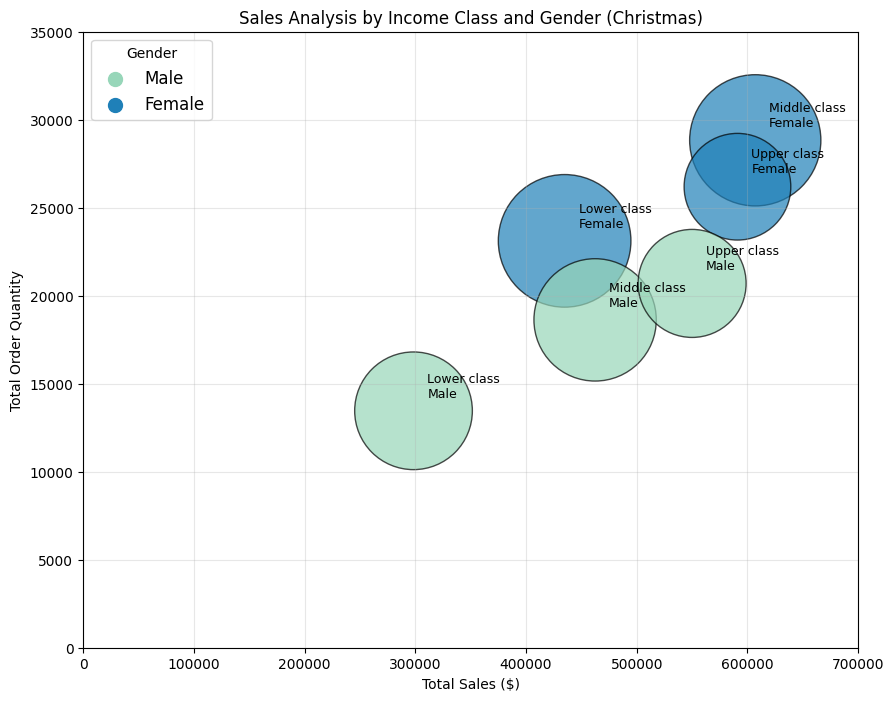

In [ ]:

df = merged_holiday.copy()
df = df[df['holiday_period'].str.contains('Christmas', na=False)]
df_q4 = df[~df['q_demos_gender'].isin(['Unknown', 'Other', 'Prefer not to say'])]

# Convert 'q_demos_income' to string before using .str accessor
df_q4['q_demos_income'] = df_q4['q_demos_income'].astype(str)
df_q4['income_numeric'] = df_q4['q_demos_income'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.extract('(\d+)').astype(float)

def categorize_income(income):
    if pd.isna(income):
        return 'Unknown'
    elif income <= 30000:
        return 'Lower class'
    elif income <= 94000:
        return 'Middle class'
    else:
        return 'Upper class'

df_q4['income_class'] = df_q4['income_numeric'].apply(categorize_income)
df_q4 = df_q4[df_q4['income_class'] != 'Unknown']
df_q4['total_sales'] = df_q4['purchase_price_per_unit'] * df_q4['quantity']

grouped_data = df_q4.groupby(['income_class', 'q_demos_gender']).agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'survey_responseid': 'nunique'}).reset_index()

grouped_data.columns = ['income_class', 'gender', 'total_sales', 'total_quantity', 'unique_customers']


plt.figure(figsize=(10, 8))
bubble_sizes = grouped_data['unique_customers'] * 10

import seaborn as sns

# Use YlGnBu colormap (2 colors) to map Male/Female
ylgnbu_colors = sns.color_palette("YlGnBu", 2)
gender_colors = {'Male': ylgnbu_colors[0], 'Female': ylgnbu_colors[1]}
colors = [gender_colors.get(g, 'gray') for g in grouped_data['gender']]

# Generate legend for gender categories
legend_elements = [plt.scatter([], [], c=color, label=gender, s=100)
  for gender, color in gender_colors.items()]
plt.legend(handles=legend_elements, title='Gender', loc='upper left', fontsize=12)

plt.scatter(
    grouped_data['total_sales'],
    grouped_data['total_quantity'],
    s=bubble_sizes,
    c=colors,
    alpha=0.7,
    edgecolors='black')

plt.xlim(0, 700000)
plt.ylim(0, 35000)

# Annotate each point with income class and gender
for i, row in grouped_data.iterrows():
    plt.annotate(
        f"{row['income_class']}\n{row['gender']}",
        (row['total_sales'], row['total_quantity']),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=9)

plt.xlabel('Total Sales ($)')
plt.ylabel('Total Order Quantity')
plt.title('Sales Analysis by Income Class and Gender (Christmas)')
plt.grid(True, alpha=0.3)
plt.show()


<font color="#1E90FF" size="6"><b>Main Analysis (Spending / Region / Product / Demographics)</b></font>


<font color="#0B132B" size="4"><b>Building on our initial findings, we narrowed our analysis from overall holiday patterns to specific peak periods, regions, product categories, and key demographic segments. By identifying when spending surges occur, where they are most concentrated, what product types drive them, and who contributes most, this deeper analysis helps define a more precise target audience for data-driven marketing and regional strategy.</b></font>

<font color="#FF9900" size="5"><b>Section 1. Spending</b></font>

###**How changes in year-over-year spending growth reveal shifts in consumer demand?**

**Short Summary:**
The year-over-year growth rate in total holiday spending shows that both holidays peaked in 2020 before declining in the following years. The 2020 surge reflected higher transaction volume rather than larger purchases, as more people shopped online during the pandemic. Although Thanksgiving consistently experienced faster growth, Christmas maintained highest average spending per transaction. This suggests that while shoppers are more active earlier in the season, the biggest value still comes from Christmas purchases. Therefore, it is more critical for Amazon to build stronger late-season campaigns to maximize spending for high-value customers.

Average holiday spending with YoY Growth:
   Year        Period  Total_Spending  YoY_Growth
0  2018     Christmas       265227.70         NaN
1  2018  Thanksgiving       228247.71         NaN
2  2019     Christmas       326130.67    0.229625
3  2019  Thanksgiving       301951.72    0.322912
4  2020     Christmas       424565.55    0.301827
5  2020  Thanksgiving       420617.25    0.392995
6  2021     Christmas       436971.87    0.029221
7  2021  Thanksgiving       443261.09    0.053835
8  2022     Christmas       297890.57   -0.318284
9  2022  Thanksgiving       422939.95   -0.045845


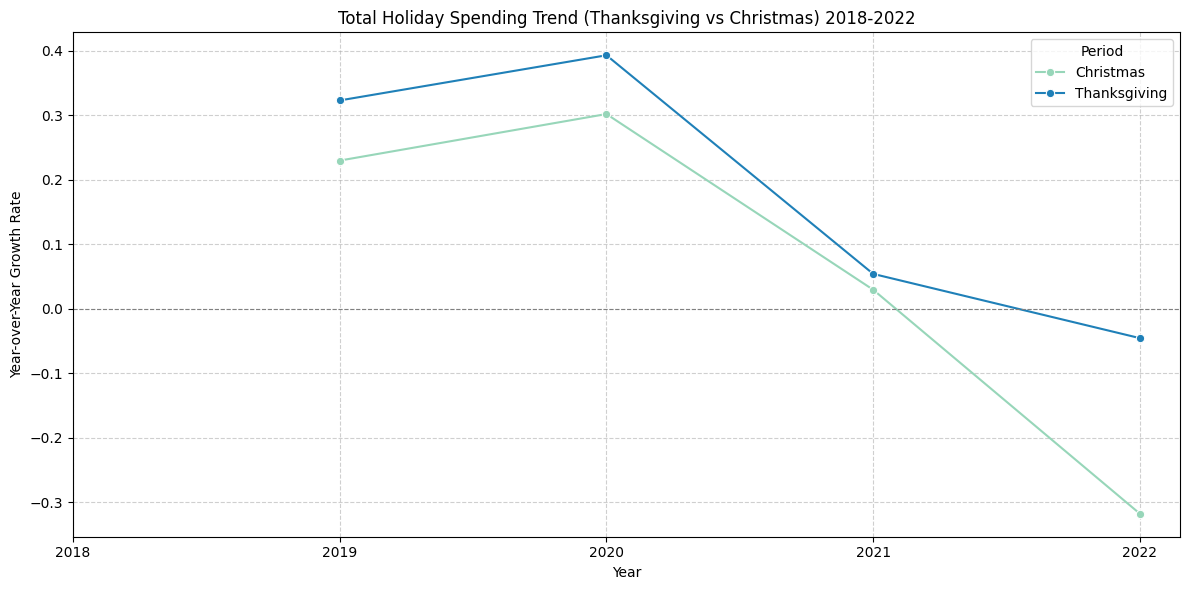

In [ ]:
# Calculate year-over-year growth in total spending
holiday_spending_by_year['YoY_Growth'] = holiday_spending_by_year.groupby('Period')['Total_Spending'].pct_change()

print("Average holiday spending with YoY Growth:")
print(holiday_spending_by_year)

# Create a line plot for Year-over-Year Growth
plt.figure(figsize=(12, 6))
sns.lineplot(data=holiday_spending_by_year, x='Year', y='YoY_Growth', hue='Period', marker='o', palette='YlGnBu')

plt.title('Total Holiday Spending Trend (Thanksgiving vs Christmas) 2018-2022')
plt.xlabel('Year')
plt.ylabel('Year-over-Year Growth Rate')
plt.xticks(holiday_spending_by_year['Year'].unique())
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

<font color="#FF9900" size="5"><b>Section 2. Regional Spending behavior</font>

###**What product categories or items do East Coast and West Coast customers buy differently on christmas?**


**Short Summary:**
Both regions share the same main products, with Books (ABIS_BOOK) and Gift Cards (GIFT_CARD) being the top categories. However, Pet Food (PET_FOOD) takes a relatively higher share of spending on the West Coast.
Overall, the two regions have nearly identical category structures, with only slight differences in the ranking and spending proportions of each category.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


# Define holiday periods
chirstmas_periods = [
    ("2018-12-11", "2018-12-31", "2018_Christmas"),
    ("2019-12-11", "2019-12-31", "2019_Christmas"),
    ("2020-12-11", "2020-12-31", "2020_Christmas"),
    ("2021-12-11", "2021-12-31", "2021_Christmas"),
    ("2022-12-11", "2022-12-31", "2022_Christmas"),]

def is_holiday(date):
    if pd.isna(date):
        return False
    date_str = date.strftime('%Y-%m-%d')
    for start, end, name in chirstmas_periods:
        if start <= date_str <= end:
            return True
    return False

df_q3['is_holiday'] = df_q3['Order Date'].apply(is_holiday)

# Filter for coastal regions and holidays only
df_filtered = df_q3[
    (df_q3['region'].isin(['East Coast','West Coast'])) &
    (df_q3['Order Date'].dt.year.between(2018, 2022))&
    (df_q3['is_holiday'] == True)
].copy()

df_filtered['year'] = df_filtered['Order Date'].dt.year

# Create total spending column
df_filtered['total_spending'] = df_filtered['Purchase Price Per Unit'] * df_filtered['Quantity']

# Analyze category by total spending for each region
cat_analysis = df_filtered.groupby(['region', 'Category'])['total_spending'].sum().reset_index()

# Get top 20 categories by total spending for each region
east_top = cat_analysis[cat_analysis['region'] == 'East Coast'].nlargest(10, 'total_spending')
west_top = cat_analysis[cat_analysis['region'] == 'West Coast'].nlargest(10, 'total_spending')

print("Top 10 Categories by Total Spending - East Coast on Christmas:")
east_top = east_top.reset_index(drop=True)
print(east_top)

print("\nTop 10 Categories by Total Spending - West Coast on Christmas:")
west_top = west_top.reset_index(drop=True)
print(west_top)

Top 10 Categories by Total Spending - East Coast on Christmas:
       region                Category  total_spending
0  East Coast               ABIS_BOOK        44007.20
1  East Coast               GIFT_CARD        17195.26
2  East Coast              HEADPHONES        16150.34
3  East Coast                PET_FOOD        15374.52
4  East Coast                   SHIRT        13956.20
5  East Coast  NUTRITIONAL_SUPPLEMENT        13580.39
6  East Coast              TOY_FIGURE        11081.95
7  East Coast                   SHOES        10840.37
8  East Coast                   PANTS        10340.53
9  East Coast          TOYS_AND_GAMES        10135.99

Top 10 Categories by Total Spending - West Coast on Christmas:
       region                Category  total_spending
0  West Coast               ABIS_BOOK        15721.36
1  West Coast                PET_FOOD         5830.44
2  West Coast               GIFT_CARD         5541.45
3  West Coast              HEADPHONES         5312.34
4  West C

/tmp/ipython-input-3930004253.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




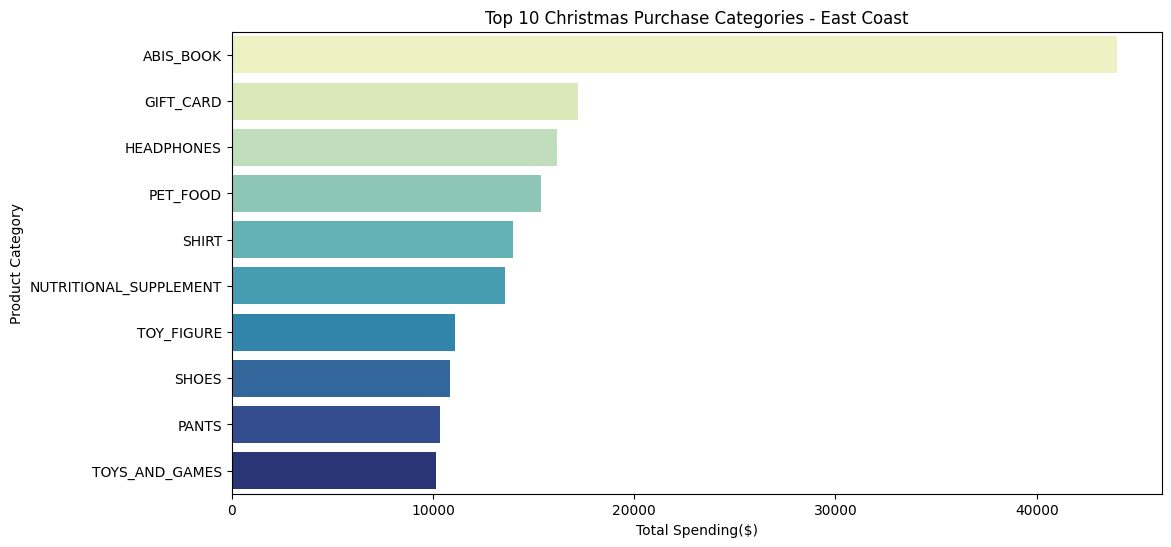

/tmp/ipython-input-3930004253.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




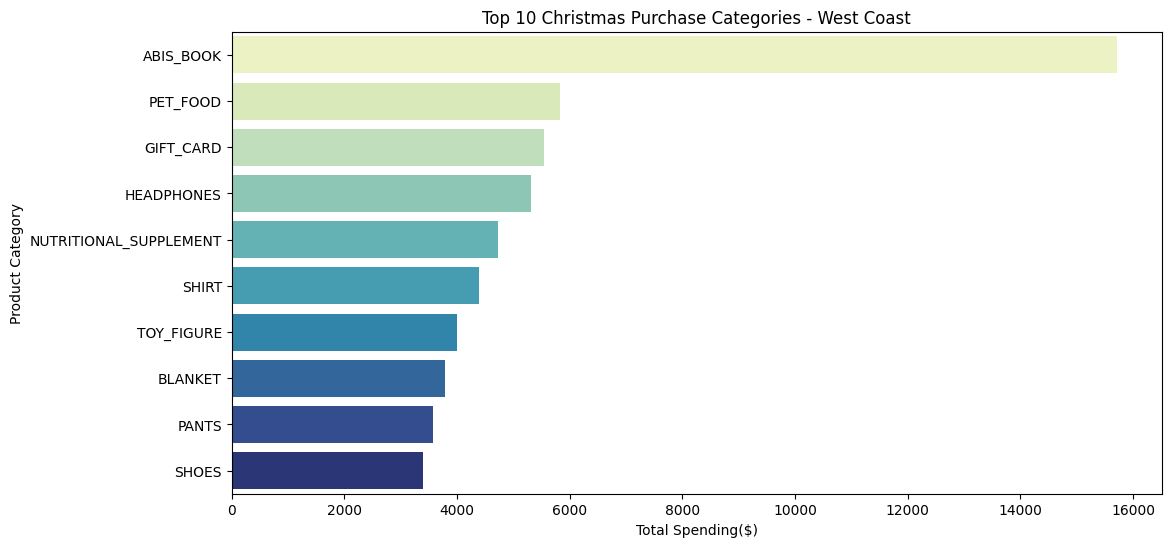

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# East Coast
plt.figure(figsize = (12,6))
g1 = sns.barplot(data=east_top,
            x='total_spending',
            y= 'Category',
            palette='YlGnBu')
g1.set_title('Top 10 Christmas Purchase Categories - East Coast')
g1.set_xlabel('Total Spending($)')
g1.set_ylabel('Product Category')
plt.show()

# West Coast
plt.figure(figsize = (12,6))
g2 = sns.barplot(data=west_top,
            x='total_spending',
            y='Category',
            palette='YlGnBu')
g2.set_title('Top 10 Christmas Purchase Categories - West Coast')
g2.set_xlabel('Total Spending($)')
g2.set_ylabel('Product Category')
plt.show()


<font color="#FF9900" size="5"><b>Section 3. Product Insights across Regions</font>







###**How does product category purchases change over time across the East and West Coasts on Christmas?**



**Short Summary:**
Holiday purchase preferences are consistent, and it does not appear to be significantly affected by special events in any particular year.

Category Purchase 2018-2022 on Holidays (East Coast): 
 year                       2018     2019      2020     2021     2022
Category                                                            
ABIS_BOOK               8454.94  7770.04  11587.31  9817.73  6377.18
GIFT_CARD               3470.70  4856.25   3373.65  2977.83  2516.83
HEADPHONES              3232.90  3143.30   2693.81  4244.72  2835.61
PET_FOOD                1801.15  2218.70   4641.68  3747.42  2965.57
SHIRT                   1860.44  3039.48   3199.72  3580.23  2276.33
NUTRITIONAL_SUPPLEMENT  1538.13  2233.78   3021.06  3903.78  2883.64
TOY_FIGURE              1528.24  2019.22   2448.68  3132.14  1953.67
SHOES                   2062.13  2638.32   1898.68  2551.08  1690.16
PANTS                   1274.43  1518.56   2969.81  2545.54  2032.19
TOYS_AND_GAMES          1545.11  2607.01   1733.83  2686.23  1563.81


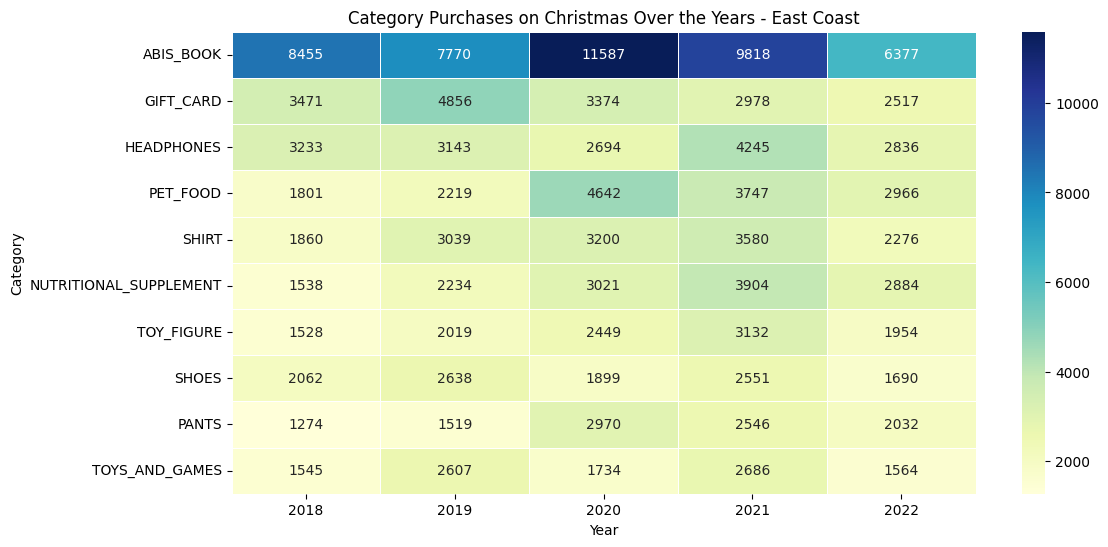

Category Purchase 2018-2022 on Holidays (West Coast): 
 year                       2018     2019     2020     2021     2022
Category                                                           
ABIS_BOOK               3343.56  3238.23  4217.40  2853.67  2068.50
PET_FOOD                 592.43  1177.77  1590.19  1443.22  1026.83
GIFT_CARD                974.95  1292.85  1039.80  1448.85   785.00
HEADPHONES               420.96  1636.17  1005.44  1477.19   772.58
NUTRITIONAL_SUPPLEMENT   548.68  1004.46  1215.22  1065.73   893.61
SHIRT                    583.30   594.97  1287.24   891.65  1039.98
TOY_FIGURE               488.03   851.98   866.61   957.34   834.32
BLANKET                  271.69   578.31  1342.32   936.10   661.47
PANTS                    448.28   678.35  1033.15   970.36   448.00
SHOES                    963.51   506.06   584.75   533.02   807.05


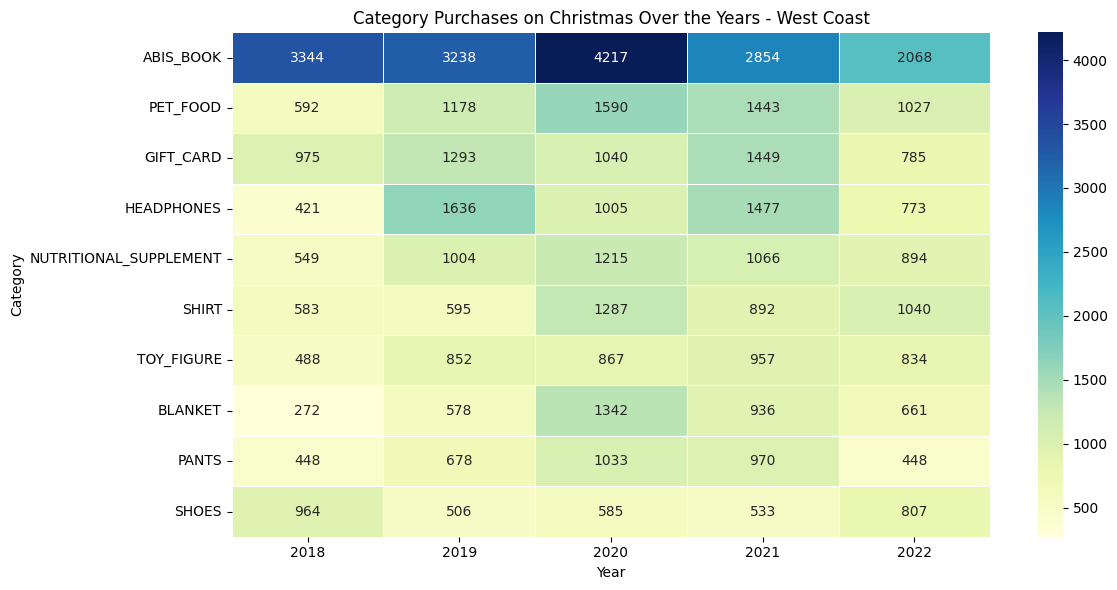

In [ ]:
# Create heatmap to see the purchases of categries over time, are they consistent?
category_year_region = (
    df_filtered.groupby(['region', 'year', 'Category'])['total_spending']
    .sum()
    .reset_index()
)

# East
east_top10 = (
    category_year_region[category_year_region['region'] == 'East Coast']
    .groupby('Category')['total_spending']
    .sum()
    .nlargest(10)
    .index
)

east_top10_overtime = (
    category_year_region[category_year_region['region'] == 'East Coast']
    .pivot_table(index='Category', columns='year', values='total_spending', fill_value=0)
    .loc[east_top10]
)

print('Category Purchase 2018-2022 on Hol (East Coast):', '\n', east_top10_overtime)

plt.figure(figsize=(12,6))
sns.heatmap(
    east_top10_overtime,
    cmap='YlGnBu',
    annot=True, fmt='.0f',
    linewidths=.5
)
plt.title('Category Purchases on Christmas Over the Years - East Coast')
plt.xlabel('Year')
plt.ylabel('Category')
plt.show()


# West
west_top10 = (
    category_year_region[category_year_region['region'] == 'West Coast']
    .groupby('Category')['total_spending']
    .sum()
    .nlargest(10)
    .index
)

west_top10_overtime = (
    category_year_region[category_year_region['region'] == 'West Coast']
    .pivot_table(index='Category', columns='year', values='total_spending', fill_value=0)
    .loc[west_top10]
)

print('Category Purchase 2018-2022 on Christmas (West Coast):', '\n', west_top10_overtime)

plt.figure(figsize=(12,6))
sns.heatmap(
    west_top10_overtime,
    cmap='YlGnBu',
    annot=True, fmt='.0f',
    linewidths=.5
)
plt.title('Category Purchases on Christmas Over the Years - West Coast')
plt.xlabel('Year')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

<font color="#FF9900" size="5"><b>Section 4. Demographics</font>

####According to the scatter plot from the team assignment phase, we decided to focus on middle-income female consumers during the Christmas period for deeper analysis.

###**How does income level vary by region among middle-class female consumers?**



**Take away**:
Looking at the middle-class female segment, the South dominates with 38.6% of middle-class female consumers, making it the primary target region. The Midwest, West, and Northeast collectively account for 61%, indicating opportunities for balanced regional marketing strategies.

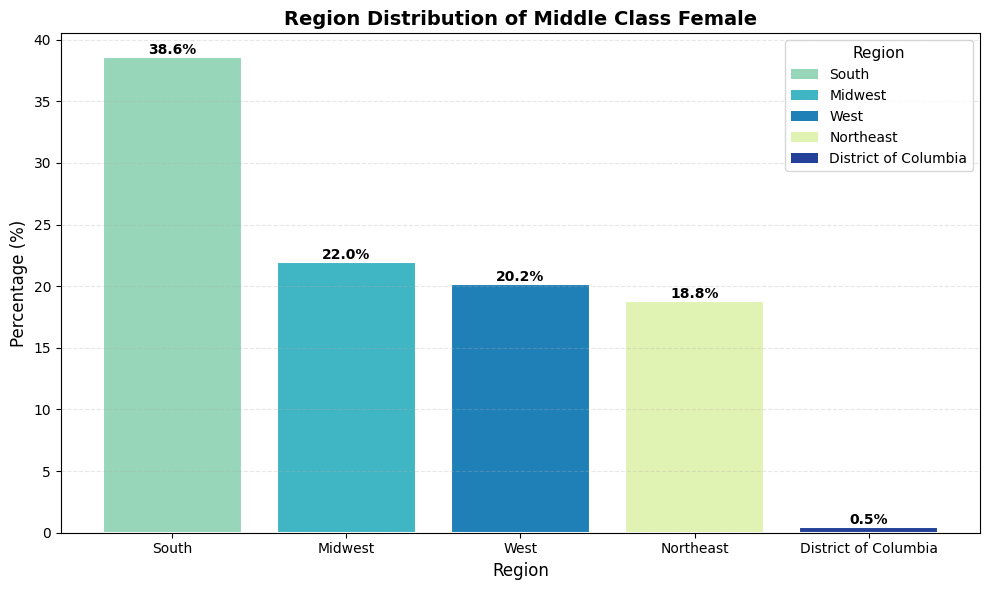

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Income classification
df_q4['income_numeric'] = df_q4['q_demos_income'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.extract(r'(\d+)').astype(float)

df_income = df_q4[(df_q4["income_class"] == "Middle class") & (df_q4["q_demos_gender"] == "Female")].copy()

df_income['region'] = df_income['q_demos_state'].apply(assign_region)

region_colors_palette = sns.color_palette("YlGnBu", 5)
region_colors = {
    'Northeast': region_colors_palette[0],
    'South': region_colors_palette[1],
    'Midwest': region_colors_palette[2],
    'West': region_colors_palette[3],
    'District of Columbia': region_colors_palette[4]
}

region_count = df_income["region"].value_counts()
region_percentage = region_count / region_count.sum() * 100


colors = [region_colors.get(region, 'gray') for region in region_count.index]


plt.figure(figsize=(10, 6))
bars = plt.bar(region_percentage.index, region_percentage.values, color=colors,
               edgecolor='white', linewidth=1.5)
plt.title('Region Distribution of Middle Class Female', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)


for bar, pct in zip(bars, region_percentage.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

legend_patches = [Patch(facecolor=region_colors[region], label=region)
                  for region in region_count.index]
plt.legend(handles=legend_patches, title='Region', loc='upper right',
           title_fontsize=11, fontsize=10)

plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

###**How does education attainment relate to income among middle-income female consumers?**



**Take away**:
Bachelor's degree holders are the largest group (54,795) among middle-class females, followed by high school graduates (39,287). Graduate degree holders represent a substantial 26,112, indicating an overall well-educated consumer segment.

/tmp/ipython-input-994176176.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




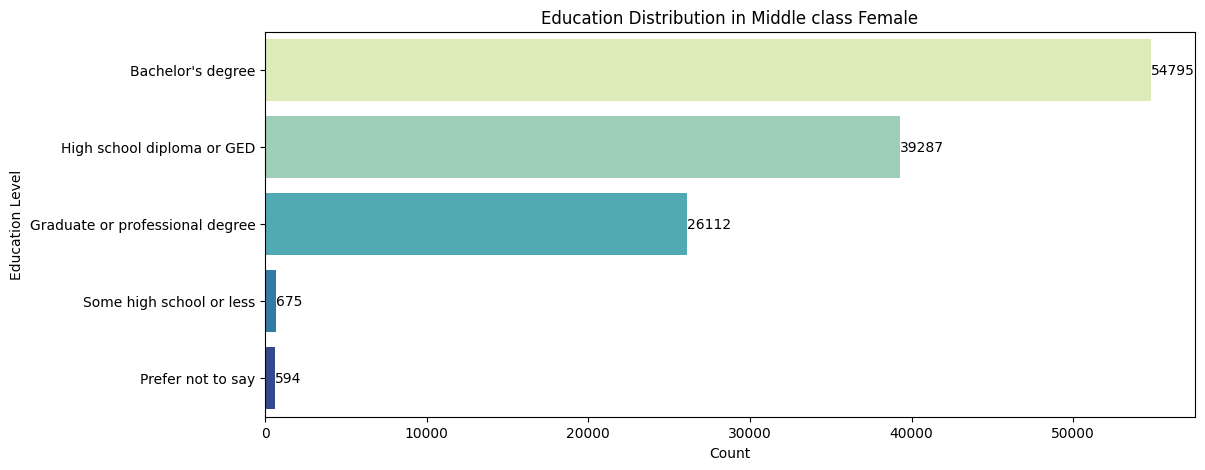

In [ ]:
#______horizontal chart_____
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

df_q4['q_demos_education'] = df_q4['q_demos_education'].str.replace(
    'Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)',
    'Graduate or professional degree')

edu_count = df_q4['q_demos_education'].value_counts()
edu_count_clean = edu_count.reset_index()

edu_colors_palette = sns.color_palette("YlGnBu", 5)
edu_colors = {
    "Bachelor's degree": edu_colors_palette[0],
    'High school diploma or GED': edu_colors_palette[1],
    'Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)': edu_colors_palette[2],
    'Some high school': edu_colors_palette[3],
    'Prefer not to say':edu_colors_palette[4]}

colors = [edu_colors.get(edu, 'gray') for edu in edu_count_clean['q_demos_education']]

plt.figure(figsize=(12,5))
sns.barplot(x="count", y="q_demos_education", data=edu_count_clean, palette=edu_colors_palette)
plt.title('Education Distribution in Middle class Female')
plt.xlabel('Count')
plt.ylabel('Education Level')
for i, v in enumerate(edu_count_clean['count']):
    plt.text(v+1, i, str(v), color='black', va='center')
plt.show()

###**What does the racial and income diversity look like within the middle-class female segment?**



**Take away**:
White or Caucasian women account for 76.1% of middle-class female consumers, while Hispanic / Latino (9.1%), Black / African American (5.5%), and Multiracial / Mixed (5.2%) groups make up smaller yet notable proportions.

In [ ]:
# Recreate df with necessary columns

columns_to_keep = [
    'order_date',
    'purchase_price_per_unit',
    'quantity',
    'survey_responseid',
    'q_demos_age',
    'q_demos_income',
    'q_demos_gender',
    'q_demos_state',
    'q_demos_education',
    'q_demos_race' # Include q_demos_race
    ]

df = merged_drop_order[columns_to_keep].copy()


df["q_demos_race"].unique()
df["q_demos_race"].value_counts(dropna=False)

,count
q_demos_race,
White or Caucasian,1498069
Black or African American,105071
Asian,100852
Other,28346
"White or Caucasian,Asian",28136
"White or Caucasian,Black or African American",25768
"White or Caucasian,American Indian/Native American or Alaska Native",20030
American Indian/Native American or Alaska Native,8666
"White or Caucasian,Other",7276


In [ ]:
def simplify_race_inclusive(race):
    if pd.isna(race):
        return 'Unknown'
    race_lower = race.lower()
    if ',' in race_lower:  # If there is a multiracial response
        return 'Multiracial / Mixed'
    elif 'white' in race_lower:
        return 'White or Caucasian'
    elif 'black' in race_lower:
        return 'Black or African American'
    elif 'asian' in race_lower:
        return 'Asian'
    elif 'native' in race_lower:
        return 'Native American / Alaska Native'
    elif 'pacific' in race_lower or 'hawaiian' in race_lower:
        return 'Native Hawaiian / Pacific Islander'
    elif 'other' in race_lower:
        return 'Other'
    else:
        return 'Unknown'

df['race_simplified'] = df['q_demos_race'].apply(simplify_race_inclusive)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

columns_to_keep = [
    'order_date',
    'purchase_price_per_unit',
    'quantity',
    'survey_responseid',
    'q_demos_age',
    'q_demos_income',
    'q_demos_gender',
    'q_demos_state',
    'q_demos_education',
    'q_demos_race',
    'q_demos_hispanic'
    ]

df = merged_drop_order[columns_to_keep].copy()

# Income classification
df['income_numeric'] = df['q_demos_income'].str.replace('$', '').str.replace(',', '').str.extract(r'(\d+)').astype(float)

def categorize_income(income):
    if pd.isna(income):
        return 'Unknown'
    elif income <= 30000:
        return 'Lower class'
    elif income <= 94000:
        return 'Middle class'
    else:
        return 'Upper class'

df['income_class'] = df['income_numeric'].apply(categorize_income)
df = df[df['income_class'] != 'Unknown']

# Filter only middle-class females
df_income = df[(df["income_class"]=="Middle class") & (df["q_demos_gender"]=="Female")].copy()

# Define a function that simplifies race categories considering diversity
def simplify_race_inclusive(race):
    if pd.isna(race):
        return 'Unknown'
    race_lower = race.lower()
    # multiracial responses
    if ',' in race_lower:
        return 'Multiracial / Mixed'
    elif 'white' in race_lower:
        return 'White or Caucasian'
    elif 'black' in race_lower:
        return 'Black or African American'
    elif 'asian' in race_lower:
        return 'Asian'
    elif 'native' in race_lower:
        return 'Native American / Alaska Native'
    elif 'pacific' in race_lower or 'hawaiian' in race_lower:
        return 'Native Hawaiian / Pacific Islander'
    elif 'other' in race_lower:
        return 'Other'
    else:
        return 'Unknown'

# Create a race_simplified column
df_income["race_simplified"] = df_income["q_demos_race"].apply(simplify_race_inclusive)

df_income["race_ethnicity"] = np.where(
    df_income["q_demos_hispanic"] == "Yes",
    "Hispanic / Latino",
    df_income["race_simplified"]
)

# Calculate proportions by group.
race_ethnicity_count = df_income["race_ethnicity"].value_counts()
race_ethnicity_percentage = race_ethnicity_count / race_ethnicity_count.sum() * 100

# Print percentage table
print("Race and Ethnicity Distribution (Middle class Female):")
print(race_ethnicity_percentage)

Race and Ethnicity Distribution (Middle class Female):
race_ethnicity
White or Caucasian                 76.117363
Hispanic / Latino                   9.105929
Black or African American           5.475962
Multiracial / Mixed                 5.236881
Asian                               3.763019
Native American / Alaska Native     0.228015
Other                               0.072831
Name: count, dtype: float64


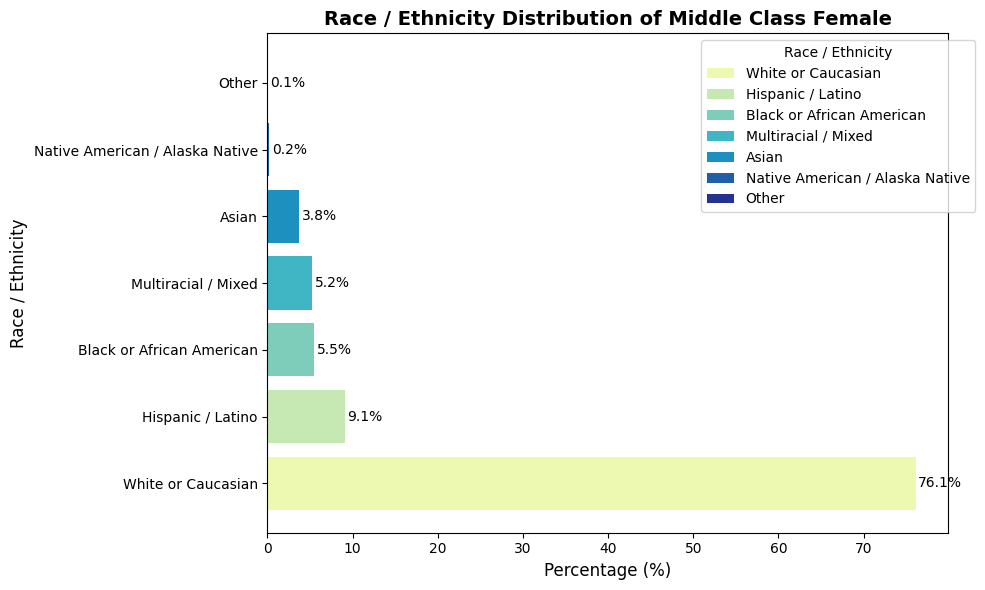

In [ ]:
palette = sns.color_palette("YlGnBu", len(race_ethnicity_count))

# Create a horizontal bar chart
plt.figure(figsize=(10,6))
bars = plt.barh(race_ethnicity_count.index, race_ethnicity_percentage.values, color=palette)

plt.title("Race / Ethnicity Distribution of Middle Class Female",
          fontsize=14, weight='bold')
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Race / Ethnicity", fontsize=12)

# Display percentage labels next to each bar
for bar, pct in zip(bars, race_ethnicity_percentage):
    plt.text(pct + 0.3, bar.get_y() + bar.get_height()/2, f"{pct:.1f}%", va='center', fontsize=10)

# legend
legend_patches = [Patch(facecolor=palette[i], label=race_ethnicity_count.index[i])
                  for i in range(len(race_ethnicity_count))]
plt.legend(handles=legend_patches, title='Race / Ethnicity', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

###**How are age categories correlated with income within the female middle-income group?**



**Take away**:
Women aged 25–34 (31.9%) and 35–44 (30.1%) together make up over 60% of middle-class female consumers, indicating that this group is primarily composed of young to mid-aged adults.

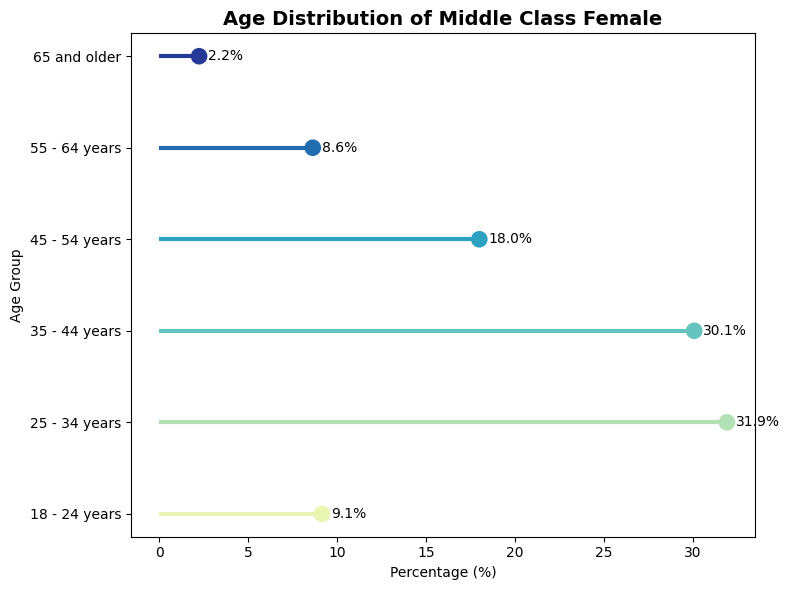

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate age distribution for middle class female
age_count = df_income['q_demos_age'].value_counts()
age_percentage = age_count / age_count.sum() * 100

# Define the order of age groups for plotting
age_order = ['18 - 24 years', '25 - 34 years', '35 - 44 years', '45 - 54 years', '55 - 64 years', '65 and older']
age_percentage = age_percentage.reindex(age_order)

plt.figure(figsize=(8,6))
colors = sns.color_palette("YlGnBu", len(age_order))
plt.hlines(y=age_order, xmin=0, xmax=age_percentage.values, color=colors, linewidth=3)
plt.scatter(age_percentage.values, age_order, s=120, color=colors)

plt.title("Age Distribution of Middle Class Female", fontsize=14, weight='bold')
plt.xlabel("Percentage (%)")
plt.ylabel("Age Group")

# Display percentage labels
for x, y in zip(age_percentage.values, age_order):
    plt.text(x + 0.5, y, f"{x:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()


<font color="#1E90FF" size="6"><b>Challenges</b></font>

Throughout this project, we encountered several key data challenges that shaped our analytical approach. First, we had to decide between analyzing by quantity, price, or total spending; we chose to calculate total spending (Price × Quantity) as it best captured overall customer value. The dataset lacked basket size information, so we manually grouped transactions by customer and date to estimate order-level spending. Besides, since no holiday periods were provided, we defined and hard-coded Thanksgiving and Christmas weeks for consistency. In terms of the dataset in general, we dropped some inconsitent or duplicated data, which reduced the amount of records. However, we believe it made our data more accurate and enhanced demographic insights. We also handled outliers using the IQR method to reduce skewness and standardized date formats for accurate time-based analysis. These challenges demostrated us the reality of data anlysis, and reminded us to constantly be thoughtful throughout the project, producing insights that can actually be trusted.



<font color="#1E90FF" size="6"><b>Conclusion</b></font>

### **Key Findings & Insights:**

This analysis reveals that holiday shopping behavior is both consistent and segment-driven. Average spending per transaction peaks during Christmas, reflecting a strong emotional and gift-oriented motivation. Although a decline was observed in 2020, likely due to the COVID-19 pandemic, spending quickly recovered in subsequent years, highlighting the resilience of consumer demand and the stability of seasonal patterns.

Regional analysis shows that the East Coast consistently leads in total holiday spending, though the gap between the East and West has gradually narrowed, suggesting convergence in shopping intensity. Both coasts display similar product category structures, indicating stable and predictable preferences across regions.

Product-level insights further reveal that Electronics (+40%), Home (+28%), and Outdoor (+23%) categories experienced the most significant spending increases during Christmas, reflecting a blend of celebration, family-oriented, and lifestyle-driven consumption.

Demographically, middle-income female consumers aged 25–44 remain the most influential holiday shoppers. This group exhibits stable purchase behavior with moderate variation in basket size, making them a reliable driver of holiday sales. The South region accounts for 38.6% of this group, positioning it as a key target area, while the Midwest, West, and Northeast provide opportunities for balanced outreach. Education and race data indicate a well-educated but demographically concentrated segment, with 76.1% identifying as White or Caucasian and largest proportion of middle-class female consumers hold a Bachelor’s degree.


### **Next Steps:**

Retailers such as Amazon can capitalize on these findings by prioritizing middle-income female consumers in the Southern U.S., particularly during the Christmas season. Marketing campaigns should emphasize emotional and gift-oriented messaging, with the foucuses on convenience, family connection, and value. They should also further tailor its regional assortments to align with regional preferences and boost conversion rates., emphasizing on electronics and lifestyle products in the West, and home and personal care items in the East.

Given the clear consistency in spending patterns and category structures, predictive analytics can play a key role in forecasting product demand and promotional timing. Incorporating behavioral and psychographic variables, such as purchase motivation, loyalty, and lifestyle segmentation, would deepen understanding of long-term consumer engagement. Tracking annual holiday performance continiously will further enhance regional planning, allowing Amazon and similar retailers to refine marketing precision, optimize inventory allocation, and sustain growth in future holiday cycles.


<font color="#1E90FF" size="6"><b>References + Generative AI disclosure</b></font>



**[Figure: Average Spending per Year— Holiday vs. Non-Holiday (2018–2022)]**
AI assistance was used to determine the appropriate timeframe for holiday weeks between 2018 and 2022 and to support code debugging throughout the analysis process. The initial bar chart was created using Matplotlib, and AI was further utilized to refine its formatting for clearer visual presentation.

**[Figure: Thanksgiving & Christmas — Top Categories by Spending Increase]**
AI assistance was used to address issues with abnormal file paths and to improve the comparison between “preliminary” and “peak” spending charts. It also supported the design of separate visualizations for clearer interpretation and helped generate legends, adjust axis scales, and refine overall formatting. Furthermore, used ChatGPT to list the holiday periods and classify the data, as well as learn how to use the .iterrows() method, generate the legend, and adjust the x and y scales.

**[Figure: Do East Coast and West Coast Shoppers Show Different Spending Growth Patterns During Holiday Seasons?]**
AI support was utilized to suggest a method for creating a U.S. regional spending map. It recommended the use of `Plotly`to generate a `choropleth map` and guided adjustments for visualization clarity and labeling accuracy.

**[Figure: Average Weekly Spending — Holiday vs. Non-Holiday (2018–2022)]**
AI assistance helped define the holiday timeframe using the `timedelta` function, debug the analysis code, and enhance the formatting of axis labels and chart layout for improved readability (e.g., using `g.axes.flat` to fix the x-axis year labels).

**[Figure: Basket Size Boxplot]**
AI was used to refine the logic for calculating basket size per order and to streamline data grouping and classification by income level. It also contributed to improving the boxplot visualization, including color palette selection and legend positioning, to better illustrate holiday versus non-holiday differences.

**[Figure: Sales Analysis by Income Class and Gender (Christmas)]**
AI support assisted in defining holiday periods, classifying the dataset, and refining the legend and axis scales of the chart. It also provided guidance on using the `.iterrows()` method for efficient data iteration.

**[Figure: Region Distribution of Middle-Class Female Consumers]**
AI assistance was used to improve the visualization design by adding precise percentage labels through the `plt.text()` function and adjusting legend positioning using the `bbox_to_anchor` parameter. This ensured accurate display without obscuring data.

**[Figure: Education Distribution in Middle-Class Female Consumers]**
AI was used to standardize and clean the education data in the `q_demos_education` column by consolidating various degree abbreviations into the single, concise category “Graduate or professional degree.” This refinement made the classification more consistent and improved subsequent analysis and visualization.